In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rcParams.update({'font.size': 20})

In [2]:
# File path
# file_path = "floor_9_fast_2.TXT"
# file_path = "floor_9_fast_1.TXT"
# file_path = "data_floor_6_loop_2_fast_gyro.TXT"

# file_path = "1740733652386_CompassGyroSumHeadingData.TXT" # works
file_path = "1740735201447_CompassGyroSumHeadingData.TXT" # works



# Read the CSV file into a DataFrame
collected_data = pd.read_csv(file_path, delimiter=';')


# Find the index of the first occurrence of 'Initial_Location'
initial_location_index = collected_data[collected_data['Type'] == 'Initial_Location'].index[0]

# Slice the DataFrame from the first occurrence onwards
data = collected_data.iloc[initial_location_index:].reset_index(drop=True)

# Now 'filtered_data' contains the data recorded after the first 'Initial_Location'


# Display the DataFrame
data

,Timestamp_(ms),Type,step,value_1,value_2,value_3,GroundTruth,value_4,value_5,turns
0,1740735220848,Initial_Location,0.0,Manual,3.760145,285.61987,286.0,836559.347447,818602.799038,0
1,1740735220851,Gyro,0.0,-0.005106182,3.765251,289.44910,286.0,0.000000,0.000000,0
2,1740735220857,Gyro,0.0,-0.006386267,3.771637,289.44910,286.0,0.000000,0.000000,0
3,1740735220860,Compass,0.0,68.1556697017937,3.771637,289.44910,286.0,0.000000,0.000000,0
4,1740735220863,Gyro,0.0,-0.009506153,3.781144,289.80414,286.0,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...
77941,1740735631287,Compass,322.5,60.338821976402556,-322.948120,275.16797,286.0,0.000000,0.000000,15
77942,1740735631288,Gyro,322.5,0.05749254,-323.005600,273.19595,286.0,0.000000,0.000000,15
77943,1740735631289,Compass,322.5,60.29400623196306,-323.005600,273.19595,286.0,0.000000,0.000000,15
77944,1740735631290,Gyro,322.5,0.06155559,-323.067170,272.22210,286.0,0.000000,0.000000,15


In [3]:
first_rows_unique_step = data.groupby('step').first().reset_index()
first_rows_unique_step

,step,Timestamp_(ms),Type,value_1,value_2,value_3,GroundTruth,value_4,value_5,turns
0,0.0,1740735220848,Initial_Location,Manual,3.760145,285.61987,286.0,836559.347447,818602.799038,0
1,0.5,1740735224046,Gyro,-0.020735089,5.955178,271.64856,286.0,0.000000,0.000000,0
2,1.0,1740735224258,Gyro,0.015039581,7.297941,268.57810,286.0,0.000000,0.000000,0
3,1.5,1740735224657,Gyro,0.19869943,3.668996,267.13574,286.0,0.000000,0.000000,0
4,2.0,1740735230523,Gyro,0.078817986,-2.797629,237.64441,286.0,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...
641,320.5,1740735600907,Compass,65.8349320744694,-322.434360,281.12260,286.0,0.000000,0.000000,15
642,321.0,1740735601167,Compass,65.4989563371051,-320.035770,282.53354,286.0,0.000000,0.000000,15
643,321.5,1740735601427,Compass,64.25793360550898,-320.796880,269.71436,286.0,0.000000,0.000000,15
644,322.0,1740735601928,Compass,62.16211793568491,-327.404240,258.95570,286.0,0.000000,0.000000,15


In [4]:
initial_location_data = data[data['Type'] == 'Initial_Location'].reset_index(drop=True)
initial_location_data

initial_position = (initial_location_data['value_4'][0],initial_location_data['value_5'][0])
initial_position

(np.float64(836559.3474470912), np.float64(818602.7990380805))

In [5]:
ground_truth_location_data = data[(data['Type'] == 'Ground_truth_Location') | (data['Type'] == 'Initial_Location')].reset_index(drop=True)

ground_truth_location_data

,Timestamp_(ms),Type,step,value_1,value_2,value_3,GroundTruth,value_4,value_5,turns
0,1740735220848,Initial_Location,0.0,Manual,3.760145,285.619870,286.0,836559.347447,818602.799038,0
1,1740735241191,Ground_truth_Location,12.0,Map Long Click,9.737687,303.296230,286.0,836549.847122,818605.340635,0
2,1740735243503,Ground_truth_Location,12.0,Map Long Click,17.228687,310.808900,286.0,836552.092648,818604.997193,0
3,1740735248546,Ground_truth_Location,12.0,Ending Marker Drag,19.812706,312.113430,286.0,836549.501651,818605.684111,0
4,1740735288469,Ground_truth_Location,51.5,Map Long Click,95.574524,39.596283,286.0,836557.066830,818631.720258,1
5,1740735291674,Ground_truth_Location,51.5,Ending Marker Drag,95.211350,35.721620,286.0,836556.963180,818632.269828,1
6,1740735297870,Ground_truth_Location,53.0,Map Long Click,22.248983,289.195700,286.0,836553.888545,818632.578904,2
7,1740735301744,Ground_truth_Location,53.0,Ending Marker Drag,19.608150,281.075230,286.0,836554.614005,818633.334580,2
8,1740735316554,Ground_truth_Location,59.0,Map Long Click,94.791210,16.160980,286.0,836556.410280,818640.547746,4
9,1740735320634,Ground_truth_Location,59.0,Ending Marker Drag,94.178650,17.851227,286.0,836556.099360,818640.719482,4


In [6]:
# Sort the DataFrame by the 'step' column
ground_truth_location_data.sort_values(by='step', inplace=True)

# Drop duplicates based on the 'step' column, keeping the last occurrence
ground_truth_location_data.drop_duplicates(subset='step', keep='last', inplace=True)

# Reset the index after dropping duplicates
ground_truth_location_data.reset_index(drop=True, inplace=True)
ground_truth_location_data

,Timestamp_(ms),Type,step,value_1,value_2,value_3,GroundTruth,value_4,value_5,turns
0,1740735220848,Initial_Location,0.0,Manual,3.760145,285.619870,286.0,836559.347447,818602.799038,0
1,1740735248546,Ground_truth_Location,12.0,Ending Marker Drag,19.812706,312.113430,286.0,836549.501651,818605.684111,0
2,1740735291674,Ground_truth_Location,51.5,Ending Marker Drag,95.211350,35.721620,286.0,836556.963180,818632.269828,1
3,1740735301744,Ground_truth_Location,53.0,Ending Marker Drag,19.608150,281.075230,286.0,836554.614005,818633.334580,2
4,1740735320634,Ground_truth_Location,59.0,Ending Marker Drag,94.178650,17.851227,286.0,836556.099360,818640.719482,4
5,1740735372087,Ground_truth_Location,119.5,Ending Marker Drag,8.119183,279.490200,286.0,836516.232633,818653.049791,5
6,1740735417649,Ground_truth_Location,164.5,Ending Marker Drag,-84.484870,200.467540,286.0,836505.592834,818622.617071,6
7,1740735452786,Ground_truth_Location,171.0,Ending Marker Drag,-138.588780,128.198030,286.0,836511.293043,818619.560164,7
8,1740735497413,Ground_truth_Location,211.5,Map Long Click,-73.269170,208.284470,286.0,836502.415092,818588.543489,9
9,1740735509134,Ground_truth_Location,212.5,Ending Marker Drag,-139.005340,97.264770,286.0,836504.902451,818587.856560,10


In [7]:
import pandas as pd
import numpy as np

# Function to compute azimuth (bearing) between two coordinates
def calculate_initial_compass_bearing(lat1, lon1, lat2, lon2):
    """
    Calculates the bearing between two points on the earth.
    """
    from math import atan2, degrees, radians, sin, cos
    
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    
    delta_lon = lon2 - lon1
    x = atan2(
        sin(delta_lon) * cos(lat2),
        cos(lat1) * sin(lat2) - sin(lat1) * cos(lat2) * cos(delta_lon)
    )
    
    bearing = (degrees(x) + 360) % 360  # Normalize to 0-360 degrees
    return bearing

In [8]:

df_gt = ground_truth_location_data

# Compute azimuth (bearing) using 'east' as longitude and 'north' as latitude
df_gt["GroundTruthHeadingComputed"] = np.nan  # Initialize column

for i in range(1, len(df_gt)):
    df_gt.loc[i, "GroundTruthHeadingComputed"] = calculate_initial_compass_bearing(
        df_gt.loc[i-1, "value_5"], df_gt.loc[i-1, "value_4"],
        df_gt.loc[i, "value_5"], df_gt.loc[i, "value_4"]
    )
df_gt

,Timestamp_(ms),Type,step,value_1,value_2,value_3,GroundTruth,value_4,value_5,turns,GroundTruthHeadingComputed
0,1740735220848,Initial_Location,0.0,Manual,3.760145,285.619870,286.0,836559.347447,818602.799038,0,NaN
1,1740735248546,Ground_truth_Location,12.0,Ending Marker Drag,19.812706,312.113430,286.0,836549.501651,818605.684111,0,286.925125
2,1740735291674,Ground_truth_Location,51.5,Ending Marker Drag,95.211350,35.721620,286.0,836556.963180,818632.269828,1,16.203982
3,1740735301744,Ground_truth_Location,53.0,Ending Marker Drag,19.608150,281.075230,286.0,836554.614005,818633.334580,2,294.402510
4,1740735320634,Ground_truth_Location,59.0,Ending Marker Drag,94.178650,17.851227,286.0,836556.099360,818640.719482,4,11.404368
5,1740735372087,Ground_truth_Location,119.5,Ending Marker Drag,8.119183,279.490200,286.0,836516.232633,818653.049791,5,289.112763
6,1740735417649,Ground_truth_Location,164.5,Ending Marker Drag,-84.484870,200.467540,286.0,836505.592834,818622.617071,6,199.311788
7,1740735452786,Ground_truth_Location,171.0,Ending Marker Drag,-138.588780,128.198030,286.0,836511.293043,818619.560164,7,120.449555
8,1740735497413,Ground_truth_Location,211.5,Map Long Click,-73.269170,208.284470,286.0,836502.415092,818588.543489,9,190.519075
9,1740735509134,Ground_truth_Location,212.5,Ending Marker Drag,-139.005340,97.264770,286.0,836504.902451,818587.856560,10,115.038444


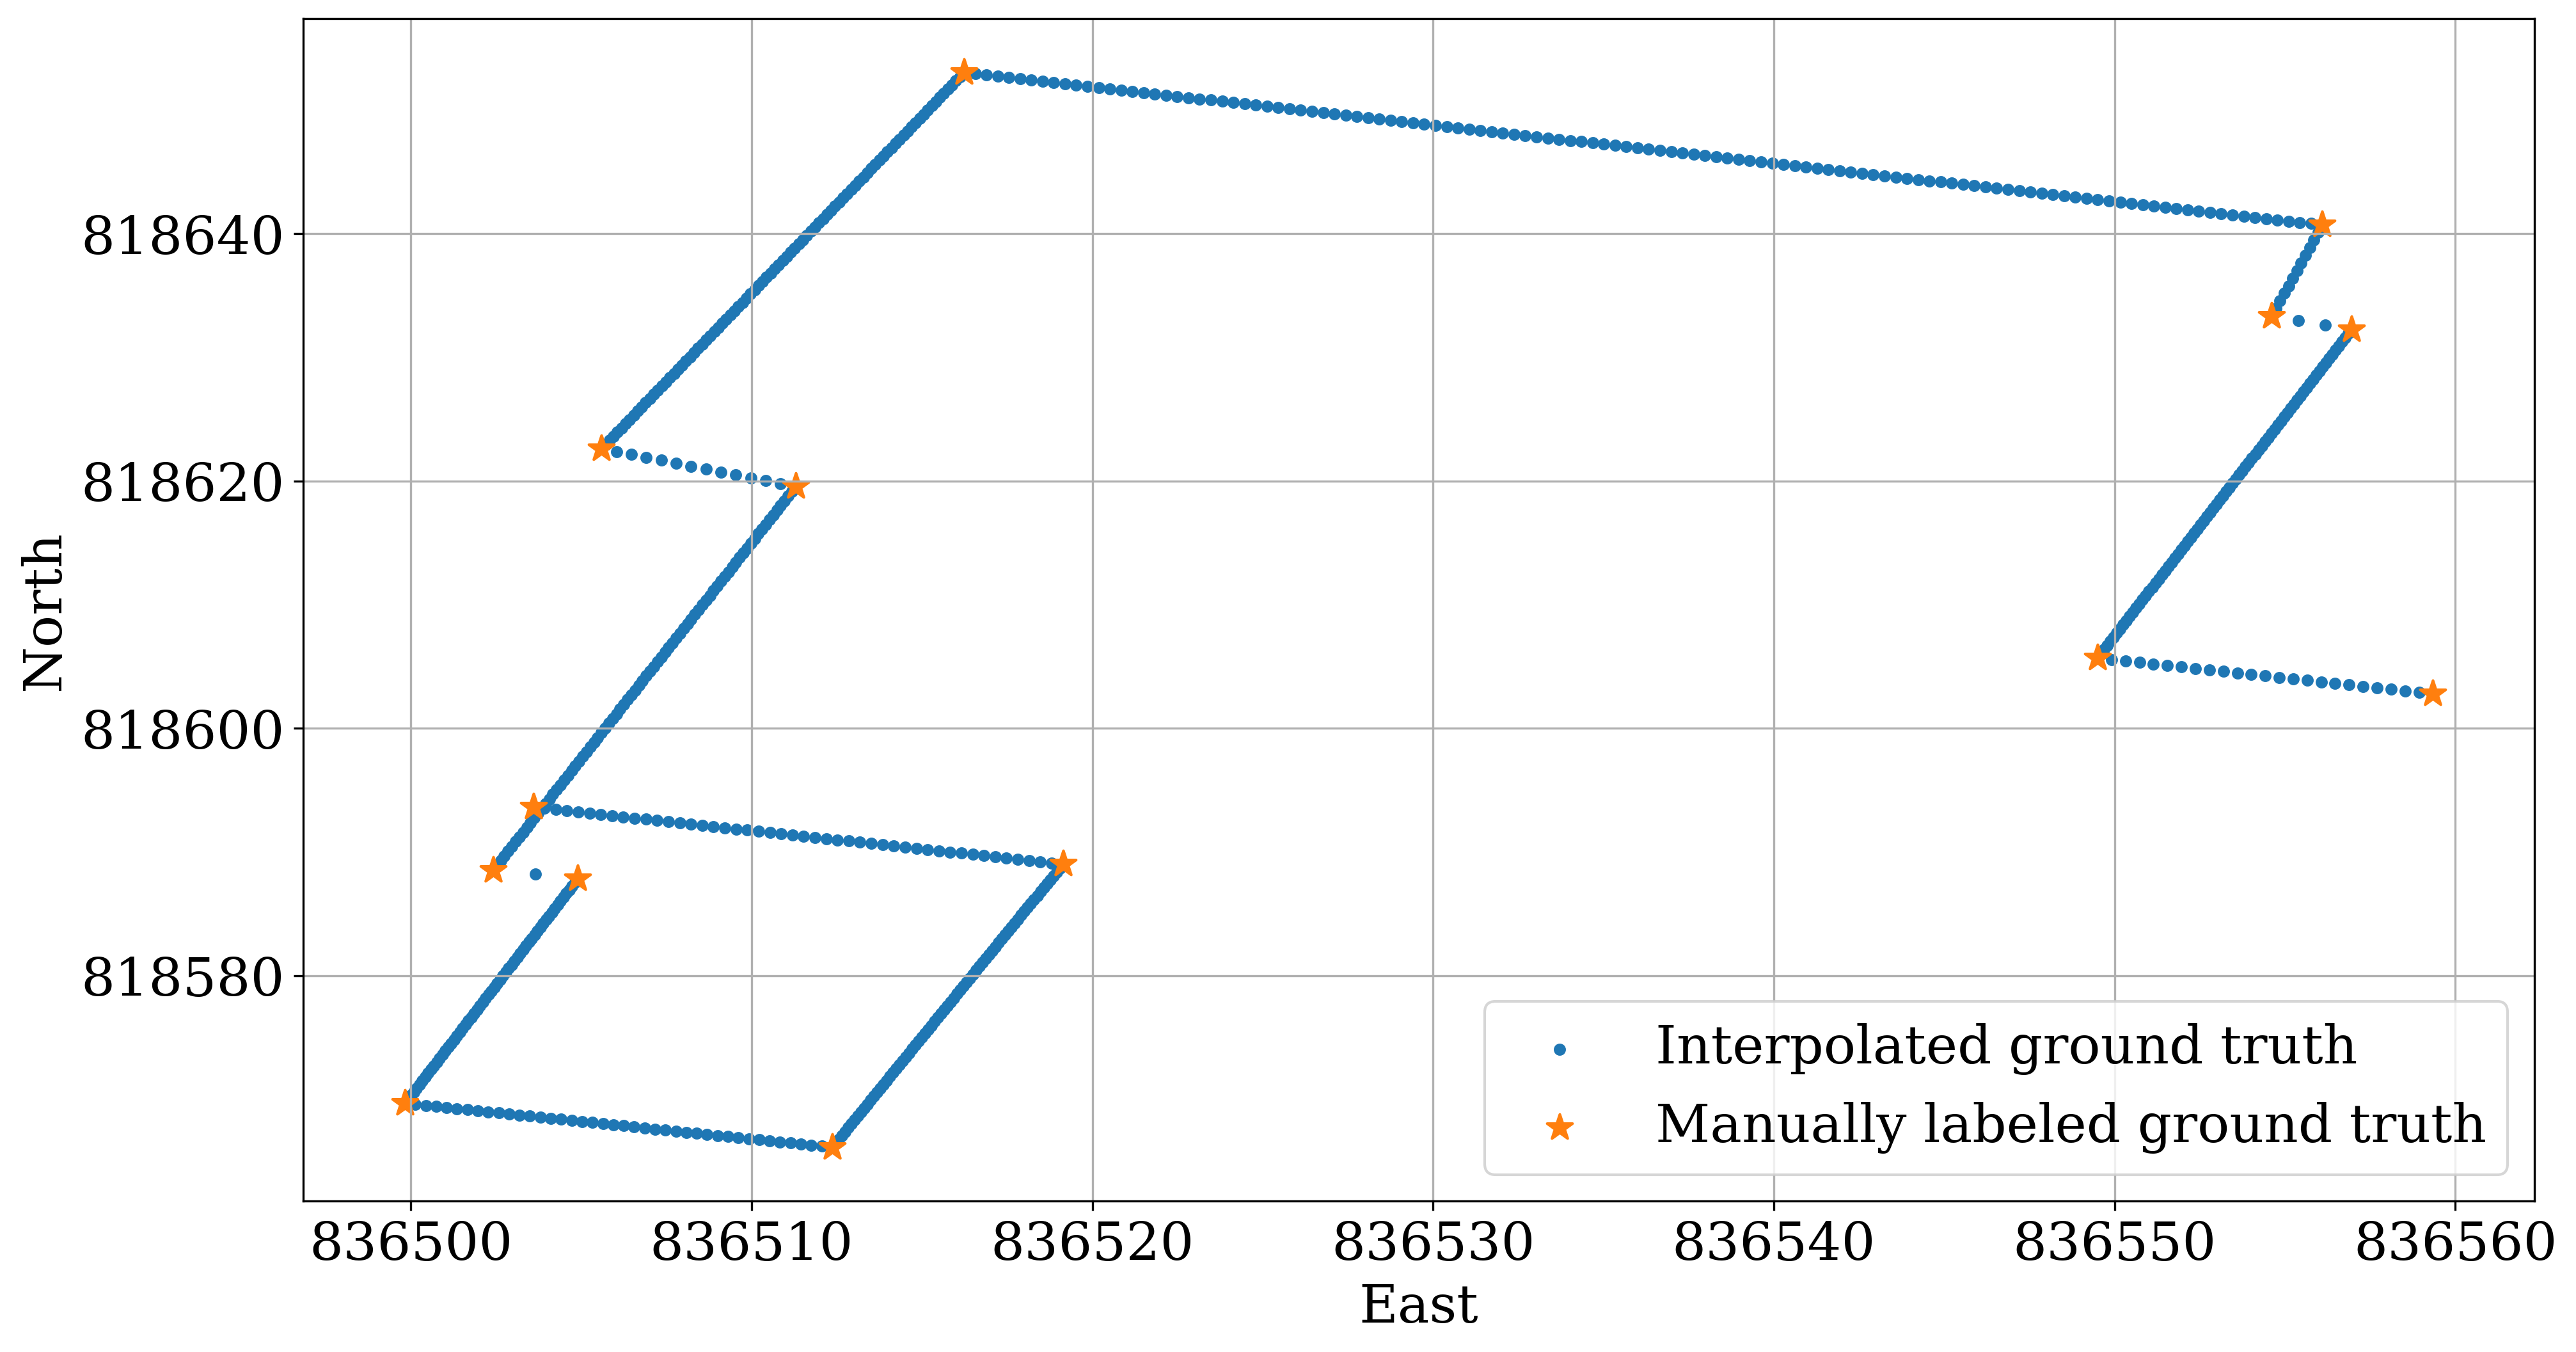

,Timestamp_(ms),Type,step,value_1,value_2,value_3,GroundTruth,value_4,value_5,turns
0,1740735220848,Initial_Location,0.0,Manual,3.760145,285.61987,286.0,836559.347447,818602.799038,0
1,1740735220851,Gyro,0.0,-0.005106182,3.765251,289.44910,286.0,0.000000,0.000000,0
2,1740735220857,Gyro,0.0,-0.006386267,3.771637,289.44910,286.0,0.000000,0.000000,0
3,1740735220860,Compass,0.0,68.1556697017937,3.771637,289.44910,286.0,0.000000,0.000000,0
4,1740735220863,Gyro,0.0,-0.009506153,3.781144,289.80414,286.0,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...
77941,1740735631287,Compass,322.5,60.338821976402556,-322.948120,275.16797,286.0,0.000000,0.000000,15
77942,1740735631288,Gyro,322.5,0.05749254,-323.005600,273.19595,286.0,0.000000,0.000000,15
77943,1740735631289,Compass,322.5,60.29400623196306,-323.005600,273.19595,286.0,0.000000,0.000000,15
77944,1740735631290,Gyro,322.5,0.06155559,-323.067170,272.22210,286.0,0.000000,0.000000,15


In [9]:
import numpy as np
import pandas as pd

# Initialize an empty list to store the interpolated positions
interpolated_positions = []

# Iterate over each pair of successive ground truth locations
for i in range(len(ground_truth_location_data) - 1):
    current_row = ground_truth_location_data.iloc[i]
    next_row = ground_truth_location_data.iloc[i + 1]
    
    # Calculate the number of half steps between the current and next ground truth locations
    num_half_steps = int((next_row['step'] - current_row['step']) * 2)
    
    # Calculate the distance between the current and next ground truth locations
    distance = np.sqrt((next_row['value_4'] - current_row['value_4'])**2 + (next_row['value_5'] - current_row['value_5'])**2)
    
    # Calculate the step size for each half step
    step_size = 1*(next_row['step'] - current_row['step']) / num_half_steps
    
    # Iterate over each half step and compute the interpolated position
    for j in range(num_half_steps):
        # Calculate the step for the current half step
        half_step = current_row['step'] + (j +0) * step_size
        
        # Calculate the interpolated position using linear interpolation
        interpolated_position = {
            'Timestamp_(ms)': np.nan,
            'Type': current_row['Type'],
            'step': half_step,
            'value_1': np.nan,
            'value_2': np.nan,
            'value_3': np.nan,
            'GroundTruth': np.nan,
            'value_4': current_row['value_4'] + (half_step - current_row['step']) / (next_row['step'] - current_row['step']) * (next_row['value_4'] - current_row['value_4']),
            'value_5': current_row['value_5'] + (half_step - current_row['step']) / (next_row['step'] - current_row['step']) * (next_row['value_5'] - current_row['value_5']),
            'turns': np.nan
        }
        
        # Append the interpolated position to the list
        interpolated_positions.append(interpolated_position)

# Append the last ground truth location to the list
interpolated_positions.append(ground_truth_location_data.iloc[-1])

# Create a DataFrame from the list of interpolated positions
interpolated_positions_df = pd.DataFrame(interpolated_positions)

# Sort the DataFrame by the 'step' column
interpolated_positions_df.sort_values(by='step', inplace=True)

# Reset the index of the DataFrame
interpolated_positions_df.reset_index(drop=True, inplace=True)

# Display the interpolated positions DataFrame
interpolated_positions_df


import matplotlib.pyplot as plt

# Plot the interpolated positions in the x-y plane
plt.figure(figsize=(15, 8), dpi=300)
plt.scatter(interpolated_positions_df['value_4'], interpolated_positions_df['value_5'],marker='.',s=50, label='Interpolated ground truth')

plt.scatter(ground_truth_location_data['value_4'], ground_truth_location_data['value_5'],marker='*', s=100, label='Manually labeled ground truth')
plt.xlabel('East')
plt.ylabel('North')
plt.ticklabel_format(useOffset=False)

plt.legend()
plt.grid(True)
plt.show()

# # Set the maximum number of rows to display
# pd.set_option('display.max_rows', None)

interpolated_positions_df

# Select only the 'step' and 'value_4' (x-coordinate) and 'value_5' (y-coordinate) columns
ground_truth_positions_steps = interpolated_positions_df[['step', 'value_4', 'value_5']]

ground_truth_positions_steps = ground_truth_positions_steps.rename(columns={'value_5': 'ground_y'})
ground_truth_positions_steps = ground_truth_positions_steps.rename(columns={'value_4': 'ground_x'})




# Display the new DataFrame
ground_truth_positions_steps
data


In [10]:
# Ensure data and df_gt are sorted by timestamp
data.sort_values(by="Timestamp_(ms)", inplace=True)
df_gt.sort_values(by="Timestamp_(ms)", inplace=True)

# Use backward fill to propagate the GroundTruthHeadingComputed values
data = data.merge(df_gt[["Timestamp_(ms)", "GroundTruthHeadingComputed"]], on="Timestamp_(ms)", how="left")
data["GroundTruthHeadingComputed"] = data["GroundTruthHeadingComputed"].fillna(method="bfill")


C:\Users\Ahmed\AppData\Local\Temp\ipykernel_35752\2139388047.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["GroundTruthHeadingComputed"] = data["GroundTruthHeadingComputed"].fillna(method="bfill")


In [11]:


# Separate data for gyro and compass
gyro_data = data[data['Type'] == 'Gyro'].reset_index(drop=True)
compass_data = data[data['Type'] == 'Compass'].reset_index(drop=True)

# Rename 'value_1' column to 'Magnetic_Field_Magnitude' in compass data
compass_data.rename(columns={'value_1': 'Magnetic_Field_Magnitude'}, inplace=True)
compass_data.rename(columns={'value_2': 'gyroSumFromstart0'}, inplace=True)
compass_data.rename(columns={'value_3': 'compass'}, inplace=True)

gyro_data.rename(columns={'value_1': 'axisZAngle'}, inplace=True)
gyro_data.rename(columns={'value_2': 'gyroSumFromstart0'}, inplace=True)
gyro_data.rename(columns={'value_3': 'compass'}, inplace=True)


# # # Convert 'Timestamp_(ms)' to datetime format
# compass_data['Timestamp_(ms)'] = pd.to_datetime(compass_data['Timestamp_(ms)'], unit='ms')

# # # Convert datetime to seconds
# compass_data['Time_seconds'] = compass_data['Timestamp_(ms)'].dt.second + compass_data['Timestamp_(ms)'].dt.minute * 60 + compass_data['Timestamp_(ms)'].dt.hour * 3600
# # Find the minimum timestamp and subtract it from all timestamps to start from 0 seconds
# min_timestamp = compass_data['Timestamp_(ms)'].min()
# compass_data['Time_seconds'] = (compass_data['Timestamp_(ms)'] - min_timestamp).dt.total_seconds()


first_ground_truth = initial_location_data['GroundTruth'][0]

# Calculate the value for the new column
compass_data['GyroStartByGroundTruth'] = first_ground_truth + compass_data['gyroSumFromstart0']-compass_data['gyroSumFromstart0'][0]

compass_data['GyroStartByGroundTruth']=(compass_data['GyroStartByGroundTruth'] + 360) % 360


gyro_data['GyroStartByGroundTruth'] = first_ground_truth + gyro_data['gyroSumFromstart0']-gyro_data['gyroSumFromstart0'][0]

gyro_data['GyroStartByGroundTruth']=(gyro_data['GyroStartByGroundTruth'] + 360) % 360

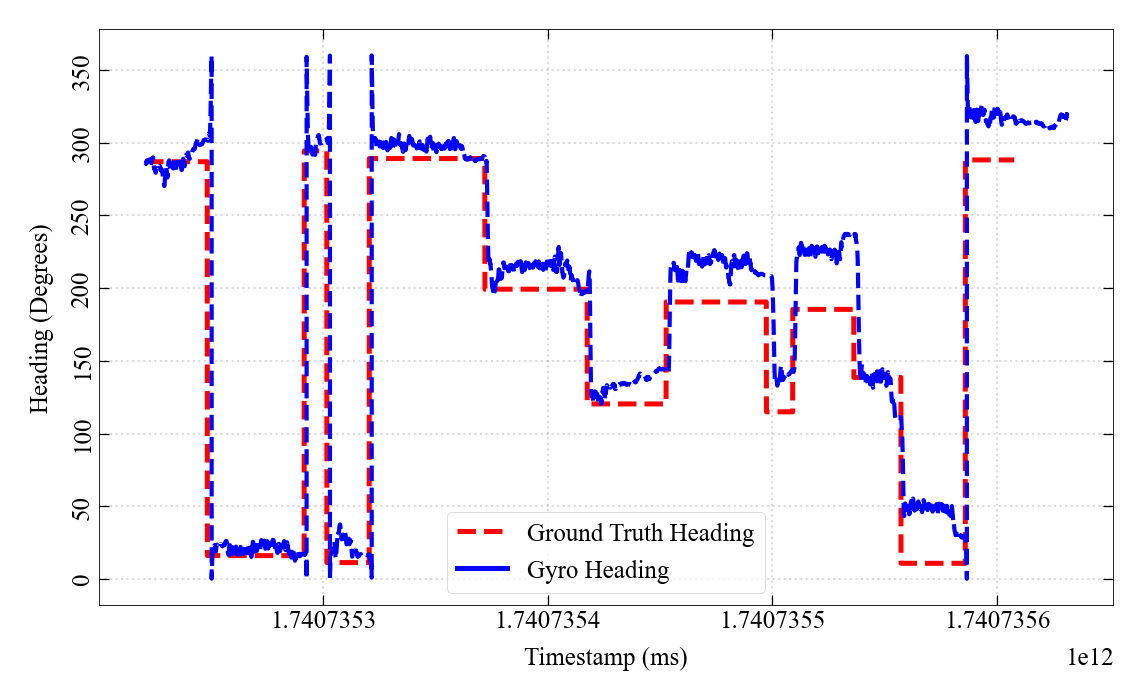

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
from matplotlib.lines import Line2D

# Set plot parameters for IEEE format
fontSizeAll = 6
plt.rcParams.update({
    'xtick.major.pad': '1',
    'ytick.major.pad': '1',
    'legend.fontsize': fontSizeAll,
    'legend.handlelength': 2,
    'font.size': fontSizeAll,
    'axes.linewidth': 0.2,
    'patch.linewidth': 0.2,
    'font.family': "Times New Roman"
})

# Create figure for IEEE column width
fig, ax = plt.subplots(figsize=(3.45, 2), dpi=300)
plt.subplots_adjust(left=0.01, bottom=0.03, right=0.99, top=0.99, wspace=0.00, hspace=0.0)

# Ensure gyro_data is sorted by timestamp
# gyro_data = data[data["Type"] == "Gyro"].sort_values(by="Timestamp_(ms)")

# Plot GroundTruthHeadingComputed
plt.plot(gyro_data["Timestamp_(ms)"], gyro_data["GroundTruthHeadingComputed"], 
         color='red', linestyle='--', linewidth=1.2, label='GroundTruth Heading Computed')
plt.plot(gyro_data["Timestamp_(ms)"], gyro_data["GyroStartByGroundTruth"], 
         color='blue', linestyle='--', linewidth=1, label='Gyro Heading')


# Plot GyroStartByGroundTruth (assuming it's stored in 'value_1' for Gyro type rows)
# plt.plot(gyro_data["Timestamp_(ms)"], gyro_data["value_1"], 
#          color='red', linestyle='-', linewidth=1.2, label='Gyro Start By GroundTruth')

# Axis formatting
# ax.yaxis.set_major_locator(MultipleLocator(40))  # Y-axis major tick interval: 40 degrees
# ax.yaxis.set_minor_locator(MultipleLocator(20))  # Y-axis minor tick interval: 20 degrees
# ax.xaxis.set_major_locator(MultipleLocator(5000))  # X-axis major tick interval: 5000ms
# ax.xaxis.set_minor_locator(MultipleLocator(2500))  # X-axis minor tick interval: 2500ms

plt.xlabel("Timestamp (ms)", labelpad=3)
plt.ylabel("Heading (Degrees)", labelpad=4)

# Rotate y-tick labels
plt.yticks(rotation=90, va="center")

# Ticks and grid
plt.tick_params(axis='both', bottom=True, top=True, left=True, right=True, direction='in', 
                which='major', grid_color='blue', width=0.3, length=2.5)
plt.tick_params(axis='both', bottom=True, top=True, left=True, right=True, direction='in', 
                which='minor', grid_color='blue', width=0.15, length=1)

# Custom Legend
legend_elements = [
    Line2D([0], [0], color='red', linestyle='--', linewidth=1.2, label='Ground Truth Heading'),
    Line2D([0], [0], color='blue', linestyle='-', linewidth=1.2, label='Gyro Heading')
]

plt.legend(handles=legend_elements, loc='best')

# Grid
ax.ticklabel_format(useOffset=False)
plt.grid(linestyle=':', linewidth=0.5, alpha=0.15, color='k')

# Show plot
plt.show()


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Initialize variables
walked_distance = 0
current_position_gt = initial_position
current_position_compass = initial_position
current_position_gyro = initial_position

# Calculate positions of all steps
positions_compass = []
positions_gt = []
positions_gyro = []
step_numbers = []  # List to track step numbers

# Initialize variables for tracking the previous step number and heading
prev_step = compass_data['step'][0]

for i in range(1, len(compass_data)):
    # Calculate change in step number
    change_in_step = compass_data['step'][i] - prev_step

    # If the step number has changed, compute the new position
    if change_in_step != 0:
        # Calculate walked distance for this step
        change_in_distance = change_in_step * 0.66
        
        # Calculate new positions for each method
        new_x_gt = current_position_gt[0] + change_in_distance * np.sin(np.radians(compass_data['GroundTruth'][i]))
        new_y_gt = current_position_gt[1] + change_in_distance * np.cos(np.radians(compass_data['GroundTruth'][i]))

        new_x_compass = current_position_compass[0] + change_in_distance * np.sin(np.radians(compass_data['compass'][i]))
        new_y_compass = current_position_compass[1] + change_in_distance * np.cos(np.radians(compass_data['compass'][i]))

        new_x_gyro = current_position_gyro[0] + change_in_distance * np.sin(np.radians(compass_data['GyroStartByGroundTruth'][i]))
        new_y_gyro = current_position_gyro[1] + change_in_distance * np.cos(np.radians(compass_data['GyroStartByGroundTruth'][i]))

        # Update current positions
        current_position_gt = (new_x_gt, new_y_gt)
        current_position_compass = (new_x_compass, new_y_compass)
        current_position_gyro = (new_x_gyro, new_y_gyro)

        # Append new positions and step numbers
        positions_gt.append(current_position_gt)
        positions_compass.append(current_position_compass)
        positions_gyro.append(current_position_gyro)
        step_numbers.append(compass_data['step'][i])  # Store step number

        # Update previous step number
        prev_step = compass_data['step'][i]
        
# Extract x and y coordinates from positions
x_positions_compass = [position[0] for position in positions_compass]
y_positions_compass = [position[1] for position in positions_compass]

x_positions_gt = [position[0] for position in positions_gt]
y_positions_gt = [position[1] for position in positions_gt]

x_positions_gyro = [position[0] for position in positions_gyro]
y_positions_gyro = [position[1] for position in positions_gyro]
# Create DataFrames with step numbers
df_positions_compass = pd.DataFrame(positions_compass, columns=['Compass_X', 'Compass_Y'])
df_positions_gt = pd.DataFrame(positions_gt, columns=['GroundTruth_X', 'GroundTruth_Y'])
df_positions_gyro = pd.DataFrame(positions_gyro, columns=['Gyro_X', 'Gyro_Y'])

# Add step number to each DataFrame
df_positions_compass['Step'] = step_numbers
df_positions_gt['Step'] = step_numbers
df_positions_gyro['Step'] = step_numbers



In [21]:
df_positions_gyro

,Gyro_X,Gyro_Y,Step
0,836559.033927,818602.902019,0.5
1,836558.722906,818603.012318,1.0
2,836558.405527,818603.102710,1.5
3,836558.079987,818603.156782,2.0
4,836557.752592,818603.198167,2.5
...,...,...,...
640,836501.120780,818606.391666,320.5
641,836500.918487,818606.652391,321.0
642,836500.712748,818606.910406,321.5
643,836500.478688,818607.143034,322.0


In [22]:
# Merge df_positions_gt with compass_data based on the step number
# Ensure the step column is of the same type in both DataFrames
df_positions_gt['Step'] = df_positions_gt['Step'].astype(float)
compass_data['step'] = compass_data['step'].astype(float)

# Perform the merge
compass_data_merged = compass_data.merge(df_positions_gt, left_on='step', right_on='Step', how='left')

# Drop the redundant 'Step' column from df_positions_gt
compass_data_merged.drop(columns=['Step'], inplace=True)

# Ensure the step column is of the same type in both DataFrames
df_positions_compass['Step'] = df_positions_compass['Step'].astype(float)
compass_data_merged['step'] = compass_data_merged['step'].astype(float)

# Perform the merge
compass_data_final = compass_data_merged.merge(df_positions_compass, left_on='step', right_on='Step', how='left')

# Drop the redundant 'Step' column from df_positions_compass
compass_data_final.drop(columns=['Step'], inplace=True)



In [23]:
# Merge df_positions_gt with compass_data based on the step number
# Ensure the step column is of the same type in both DataFrames
df_positions_gt['Step'] = df_positions_gt['Step'].astype(float)
gyro_data['step'] = gyro_data['step'].astype(float)

# Perform the merge
gyro_data_merged = gyro_data.merge(df_positions_gt, left_on='step', right_on='Step', how='left')

# Drop the redundant 'Step' column from df_positions_gt
gyro_data_merged.drop(columns=['Step'], inplace=True)

# Ensure the step column is of the same type in both DataFrames
df_positions_gyro['Step'] = df_positions_gyro['Step'].astype(float)
gyro_data_merged['step'] = gyro_data_merged['step'].astype(float)

# Perform the merge
gyro_data_final = gyro_data_merged.merge(df_positions_gyro, left_on='step', right_on='Step', how='left')

# Drop the redundant 'Step' column from df_positions_compass
gyro_data_final.drop(columns=['Step'], inplace=True)



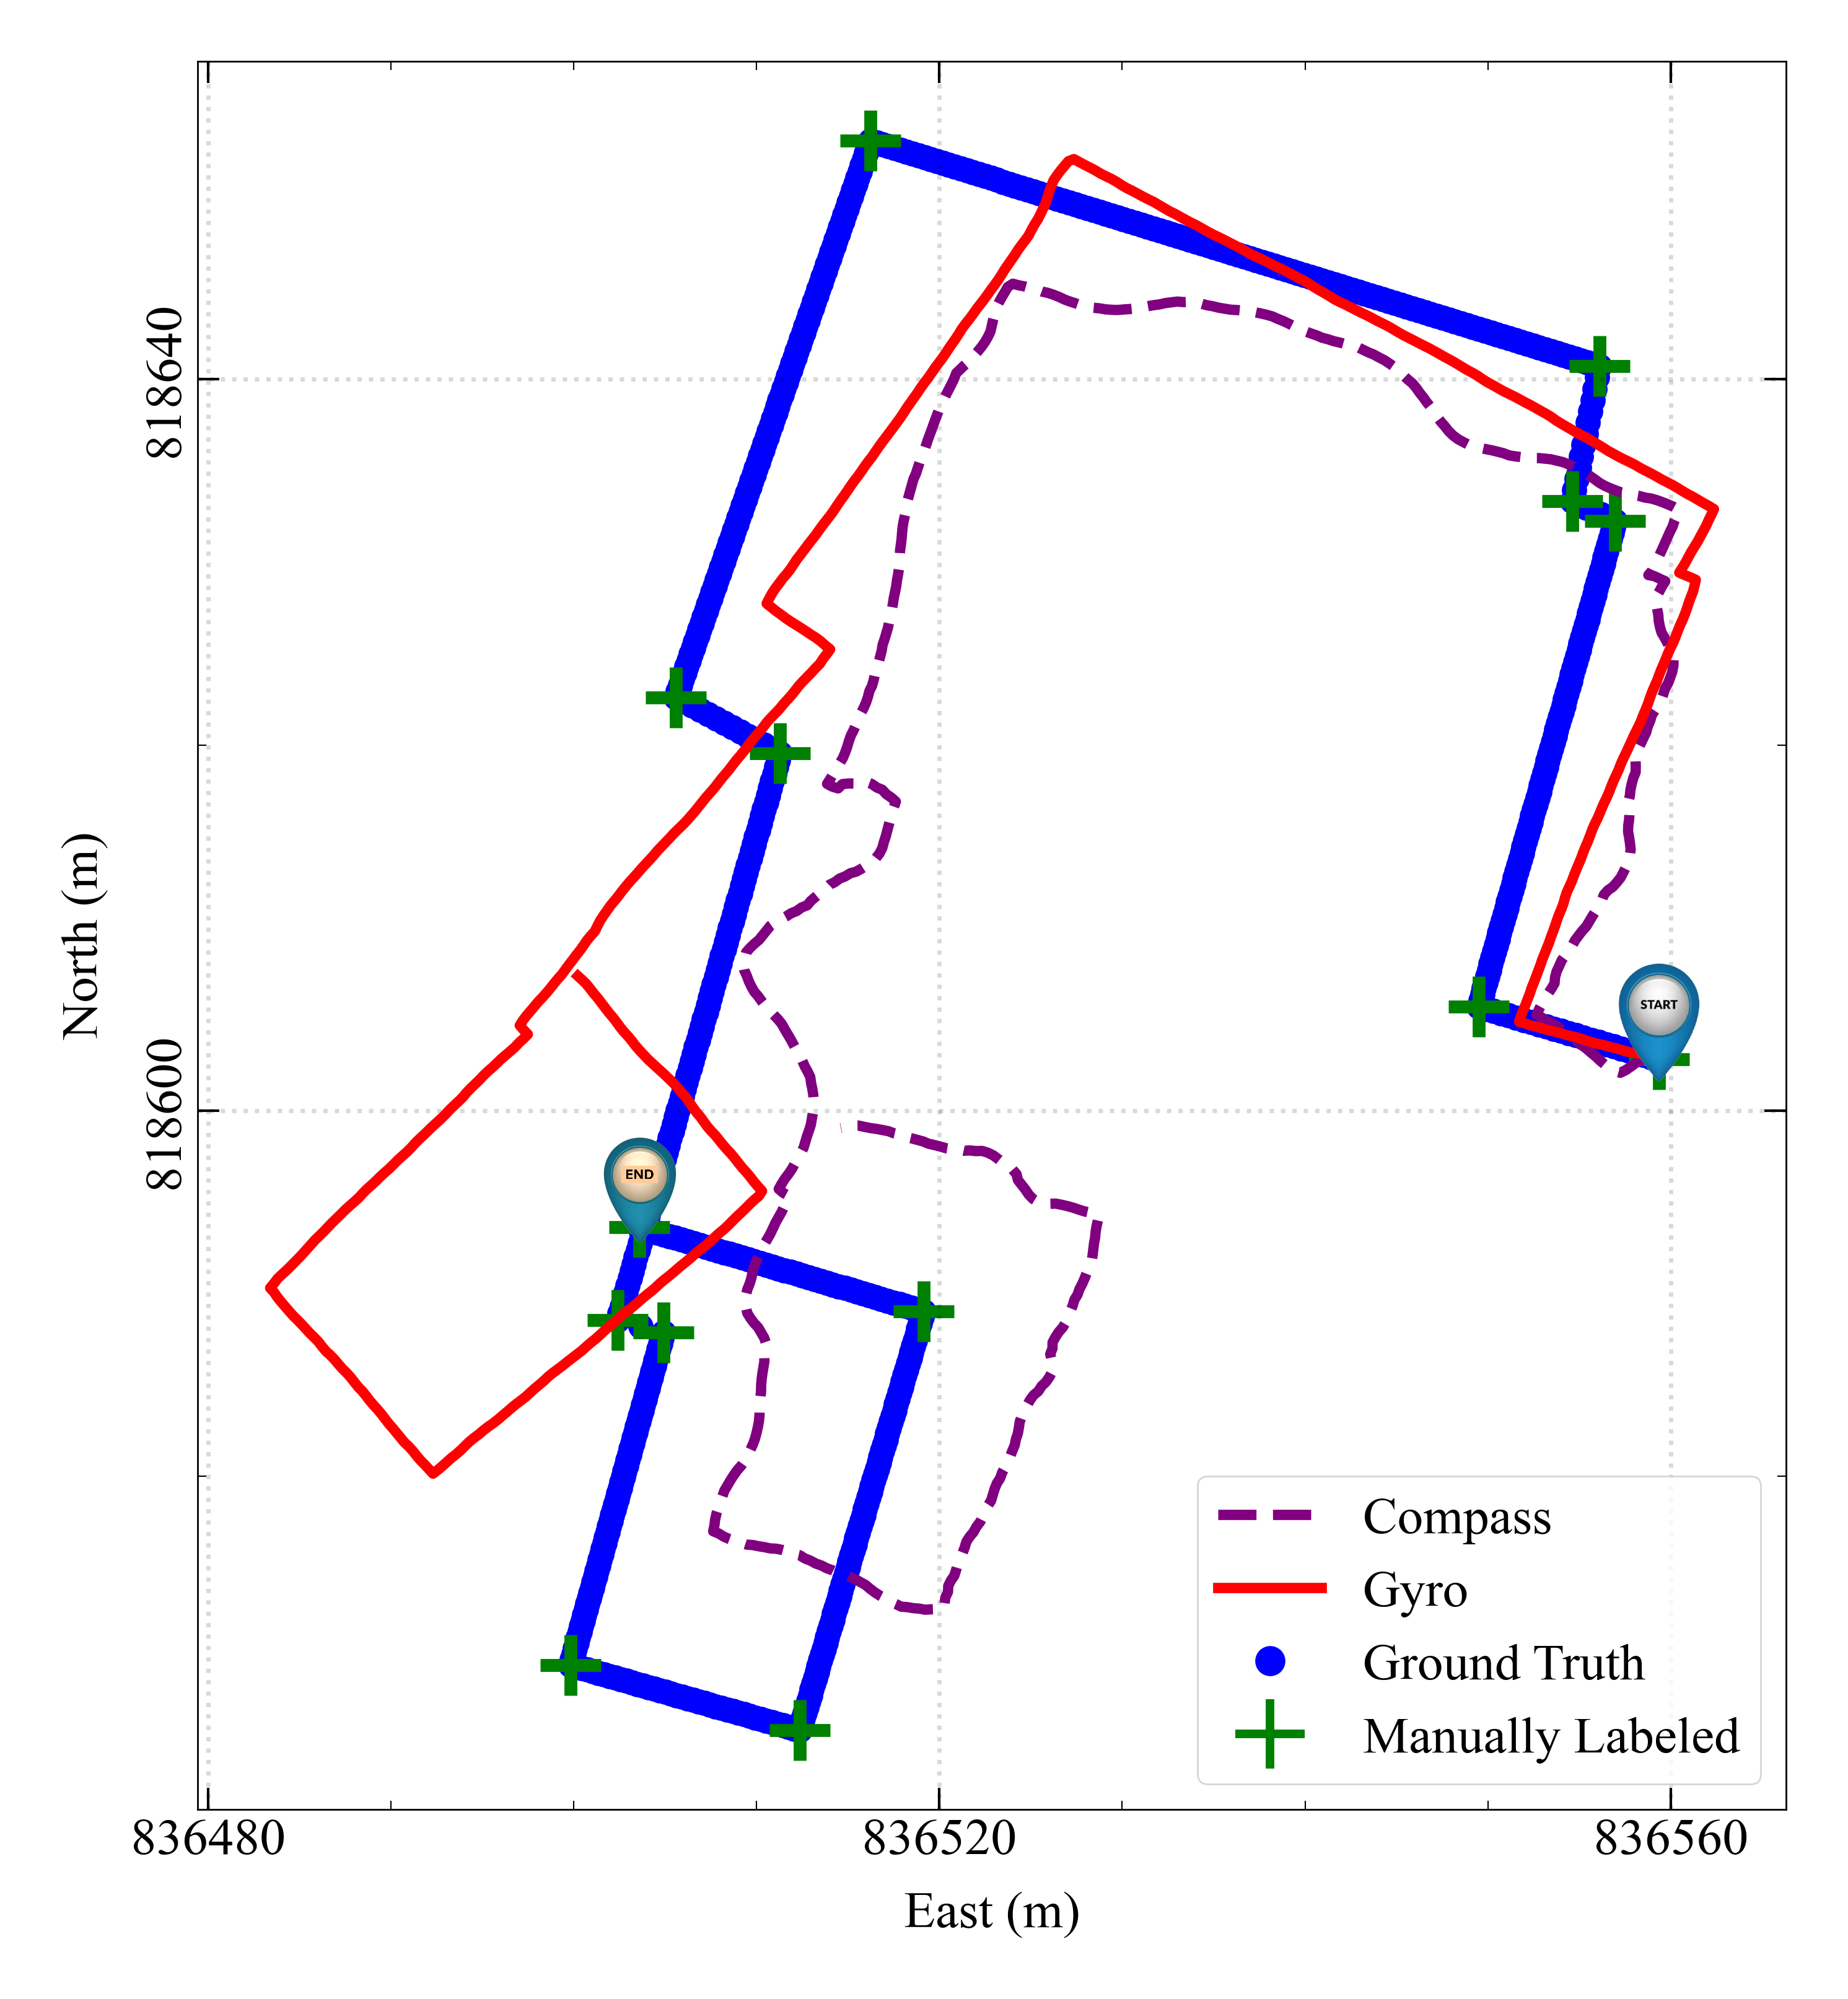

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from matplotlib.ticker import MultipleLocator
from matplotlib.lines import Line2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Set plot parameters for IEEE format
fontSizeAll = 6
plt.rcParams.update({
    'xtick.major.pad': '1',
    'ytick.major.pad': '1',
    'legend.fontsize': fontSizeAll,
    'legend.handlelength': 2,
    'font.size': fontSizeAll,
    'axes.linewidth': 0.2,
    'patch.linewidth': 0.2,
    'font.family': "Times New Roman"
})

# Load custom markers (replace with correct file paths if necessary)
start_img = mpimg.imread("start.png")
end_img = mpimg.imread("enda.png")

# Function to add image marker at specific coordinates
def add_marker(ax, img, x, y, zoom=0.1):
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, (x, y), frameon=False, zorder=100)
    ax.add_artist(ab)

# Create figure for IEEE column width
fig, ax = plt.subplots(figsize=(3.45, 2.94), dpi=1000)
plt.subplots_adjust(left=0.01, bottom=0.03, right=0.99, top=0.99, wspace=0.00, hspace=0.0)

# Plot Tracks (Swapping axes: East on X, North on Y)
plt.plot(x_positions_compass, y_positions_compass, color='purple', linestyle='--', linewidth=1.2, label='Compass')
plt.plot(x_positions_gyro, y_positions_gyro, color='red', linestyle='-', linewidth=1.2, label='Gyro')

# Ground truth positions 
plt.scatter(interpolated_positions_df['value_4'], interpolated_positions_df['value_5'], 
            c='blue', marker='.', s=30, label='Ground Truth')

# Manually labeled points 
plt.scatter(ground_truth_location_data['value_4'], ground_truth_location_data['value_5'], 
            marker='+', s=50, c='green', label='Manually Labeled')

# Add start and end markers on Ground Truth positions
start_x, start_y = ground_truth_location_data['value_4'].iloc[0], ground_truth_location_data['value_5'].iloc[0]+2
end_x, end_y = ground_truth_location_data['value_4'].iloc[-1], ground_truth_location_data['value_5'].iloc[-1]+2

add_marker(ax, start_img, start_x, start_y, zoom=0.05)
add_marker(ax, end_img, end_x, end_y, zoom=0.013)

# Axis formatting
ax.yaxis.set_major_locator(MultipleLocator(40))  # Y-axis major tick interval: 40m
ax.yaxis.set_minor_locator(MultipleLocator(20))  # Y-axis minor tick interval: 20m
ax.xaxis.set_major_locator(MultipleLocator(40))  # X-axis major tick interval: 40m
ax.xaxis.set_minor_locator(MultipleLocator(10))  # X-axis minor tick interval: 10m

plt.axis('scaled')

# Labels (Swapped: East on X-axis, North on Y-axis)
plt.xlabel('East (m)', labelpad=3)
plt.ylabel('North (m)', labelpad=4)

# Rotate y-tick labels
plt.yticks(rotation=90, va="center")

# Ticks and grid
plt.tick_params(axis='both', bottom=True, top=True, left=True, right=True, direction='in', 
                which='major', grid_color='blue', width=0.3, length=2.5)
plt.tick_params(axis='both', bottom=True, top=True, left=True, right=True, direction='in', 
                which='minor', grid_color='blue', width=0.15, length=1)

# Custom Legend
legend_elements = [
    Line2D([0], [0], color='purple', linestyle='--', linewidth=1.2, label='Compass'),
    Line2D([0], [0], color='red', linestyle='-', linewidth=1.2, label='Gyro'),
    Line2D([0], [0], marker='.', color='blue', markersize=5, linestyle='None', label='Ground Truth'),
    Line2D([0], [0], marker='+', color='green', markersize=8, linestyle='None', label='Manually Labeled')
]

plt.legend(handles=legend_elements, loc='best')

# Grid
ax.ticklabel_format(useOffset=False)
plt.grid(linestyle=':', linewidth=0.5, alpha=0.15, color='k')

# Show plot
plt.show()


In [25]:
# Drop duplicate steps
unique_steps_data = compass_data.drop_duplicates(subset=['step']).reset_index(drop=True)

# Concatenate positions DataFrames with unique_steps_data
unique_steps_data = pd.concat([unique_steps_data, df_positions_compass, df_positions_gt, df_positions_gyro], axis=1)

# Display the updated DataFrame
unique_steps_data

# Select only the 'step' and 'value_4' (x-coordinate) and 'value_5' (y-coordinate) columns
compass_gyro_positions_steps = unique_steps_data[['step', 'Gyro_X', 'Gyro_Y', 'Compass_X', 'Compass_Y']]


# Merge the two DataFrames based on the 'step' column
comapre = compass_gyro_positions_steps.merge(ground_truth_positions_steps, on='step')

# Display the combined DataFrame
comapre


,step,Gyro_X,Gyro_Y,Compass_X,Compass_Y,ground_x,ground_y
0,0.0,836559.033927,818602.902019,836559.017584,818602.808532,836559.347447,818602.799038
1,0.5,836558.722906,818603.012318,836558.687685,818602.800343,836558.937206,818602.919249
2,1.0,836558.405527,818603.102710,836558.358098,818602.783853,836558.526964,818603.039461
3,1.5,836558.079987,818603.156782,836558.079332,818602.607246,836558.116723,818603.159672
4,2.0,836557.752592,818603.198167,836557.816002,818602.408356,836557.706481,818603.279884
...,...,...,...,...,...,...,...
641,320.5,836500.918487,818606.652391,836515.589351,818599.185997,836504.912657,818593.235367
642,321.0,836500.712748,818606.910406,836515.259355,818599.184352,836504.581891,818593.333291
643,321.5,836500.478688,818607.143034,836514.935467,818599.121135,836504.251125,818593.431215
644,322.0,836500.234722,818607.365251,836514.611554,818599.058045,836503.920360,818593.529139


In [26]:

# Add error columns to unique_steps_data for gyro
comapre['Gyro_Error_X'] = np.abs(comapre['Gyro_X'] - comapre['ground_x'])
comapre['Gyro_Error_Y'] = np.abs(comapre['Gyro_Y'] - comapre['ground_y'])

# Calculate the distance error between gyro and ground truth for each step
gyro_distance_error = np.sqrt((comapre['Gyro_Error_X'])**2 + (comapre['Gyro_Error_Y'])**2)

# Add distance error column to unique_steps_data for gyro
comapre['Gyro_Distance_Error'] = gyro_distance_error



# Add error columns to unique_steps_data for compass
comapre['Compass_Error_X'] = np.abs(comapre['Compass_X'] - comapre['ground_x'])
comapre['Compass_Error_Y'] = np.abs(comapre['Compass_Y'] - comapre['ground_y'])

# Calculate the distance error between compass and ground truth for each step
compass_distance_error = np.sqrt((comapre['Compass_Error_X'])**2 + (comapre['Compass_Error_Y'])**2)

# Add distance error column to unique_steps_data for compass
comapre['Compass_Distance_Error'] = compass_distance_error

# Display the updated DataFrame
comapre
comapre['Walked_distance']=comapre['step']*0.66
comapre

,step,Gyro_X,Gyro_Y,Compass_X,Compass_Y,ground_x,ground_y,Gyro_Error_X,Gyro_Error_Y,Gyro_Distance_Error,Compass_Error_X,Compass_Error_Y,Compass_Distance_Error,Walked_distance
0,0.0,836559.033927,818602.902019,836559.017584,818602.808532,836559.347447,818602.799038,0.313520,0.102980,0.330000,0.329863,0.009494,0.330000,0.00
1,0.5,836558.722906,818603.012318,836558.687685,818602.800343,836558.937206,818602.919249,0.214300,0.093068,0.233637,0.249520,0.118906,0.276404,0.33
2,1.0,836558.405527,818603.102710,836558.358098,818602.783853,836558.526964,818603.039461,0.121437,0.063249,0.136921,0.168867,0.255608,0.306352,0.66
3,1.5,836558.079987,818603.156782,836558.079332,818602.607246,836558.116723,818603.159672,0.036736,0.002891,0.036849,0.037390,0.552426,0.553690,0.99
4,2.0,836557.752592,818603.198167,836557.816002,818602.408356,836557.706481,818603.279884,0.046111,0.081717,0.093829,0.109521,0.871528,0.878382,1.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,320.5,836500.918487,818606.652391,836515.589351,818599.185997,836504.912657,818593.235367,3.994170,13.417024,13.998926,10.676694,5.950631,12.223003,211.53
642,321.0,836500.712748,818606.910406,836515.259355,818599.184352,836504.581891,818593.333291,3.869143,13.577115,14.117660,10.677464,5.851062,12.175515,211.86
643,321.5,836500.478688,818607.143034,836514.935467,818599.121135,836504.251125,818593.431215,3.772437,13.711819,14.221296,10.684342,5.689920,12.104972,212.19
644,322.0,836500.234722,818607.365251,836514.611554,818599.058045,836503.920360,818593.529139,3.685637,13.836113,14.318587,10.691195,5.528906,12.036214,212.52


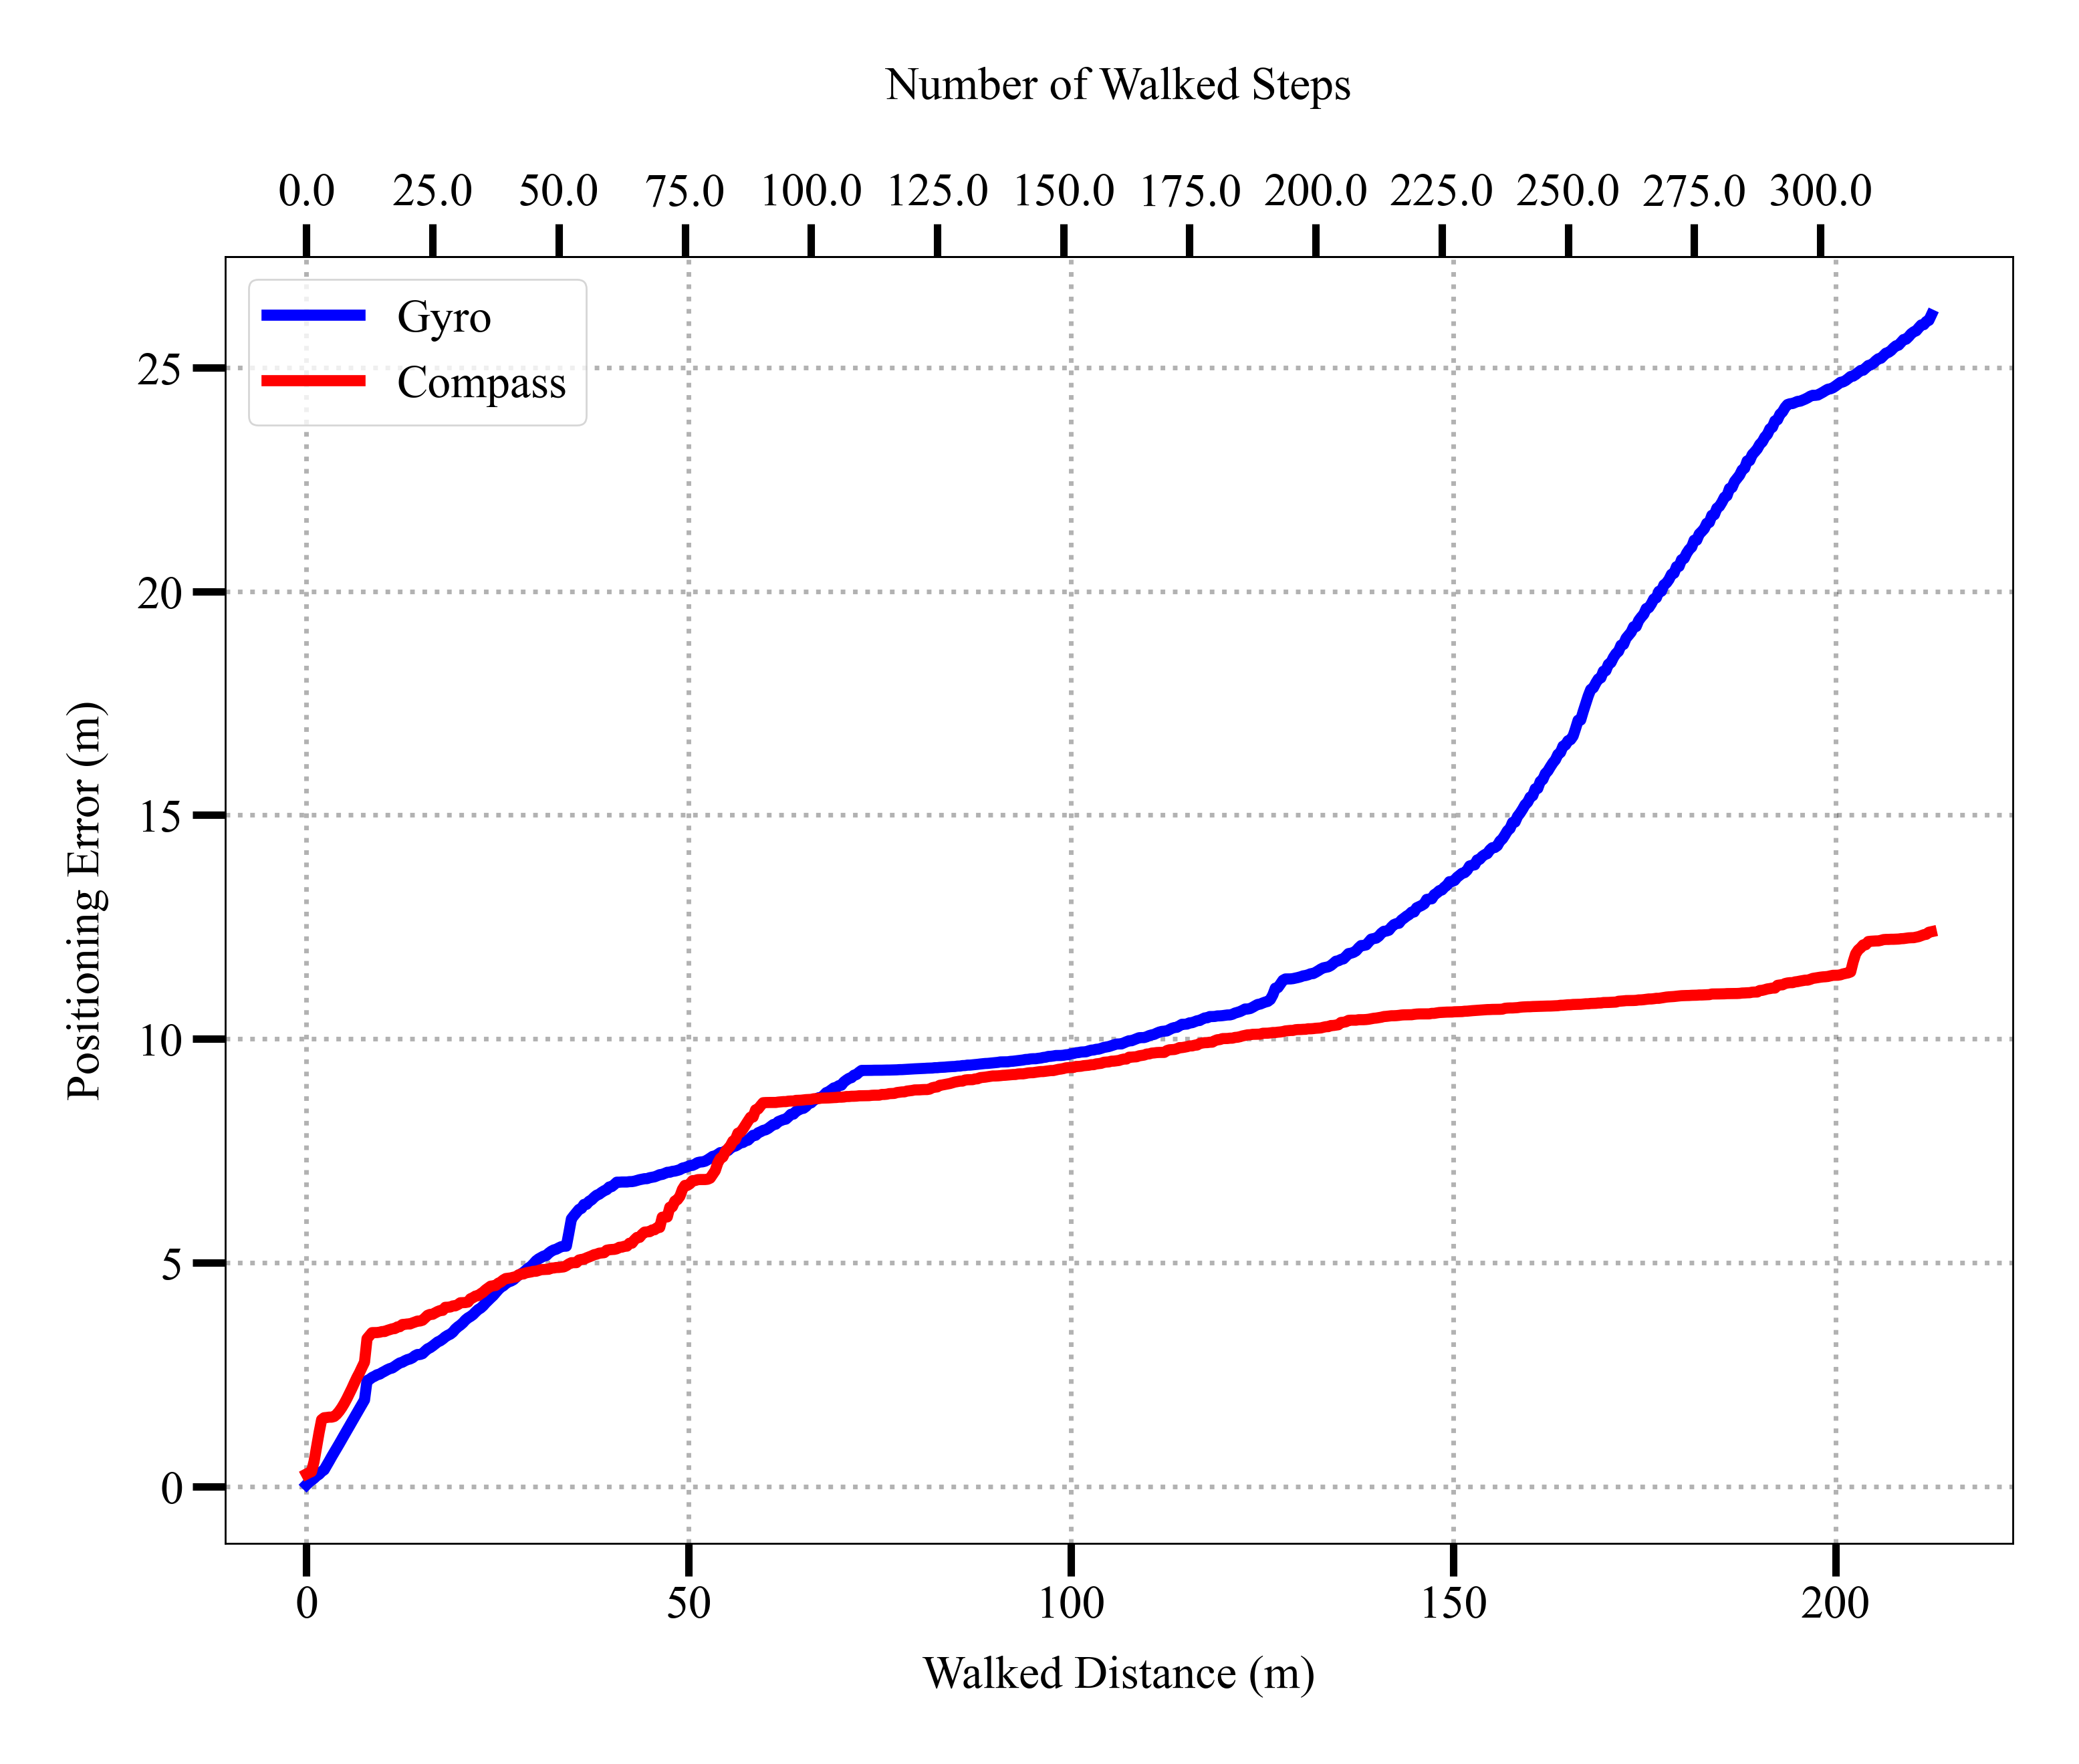

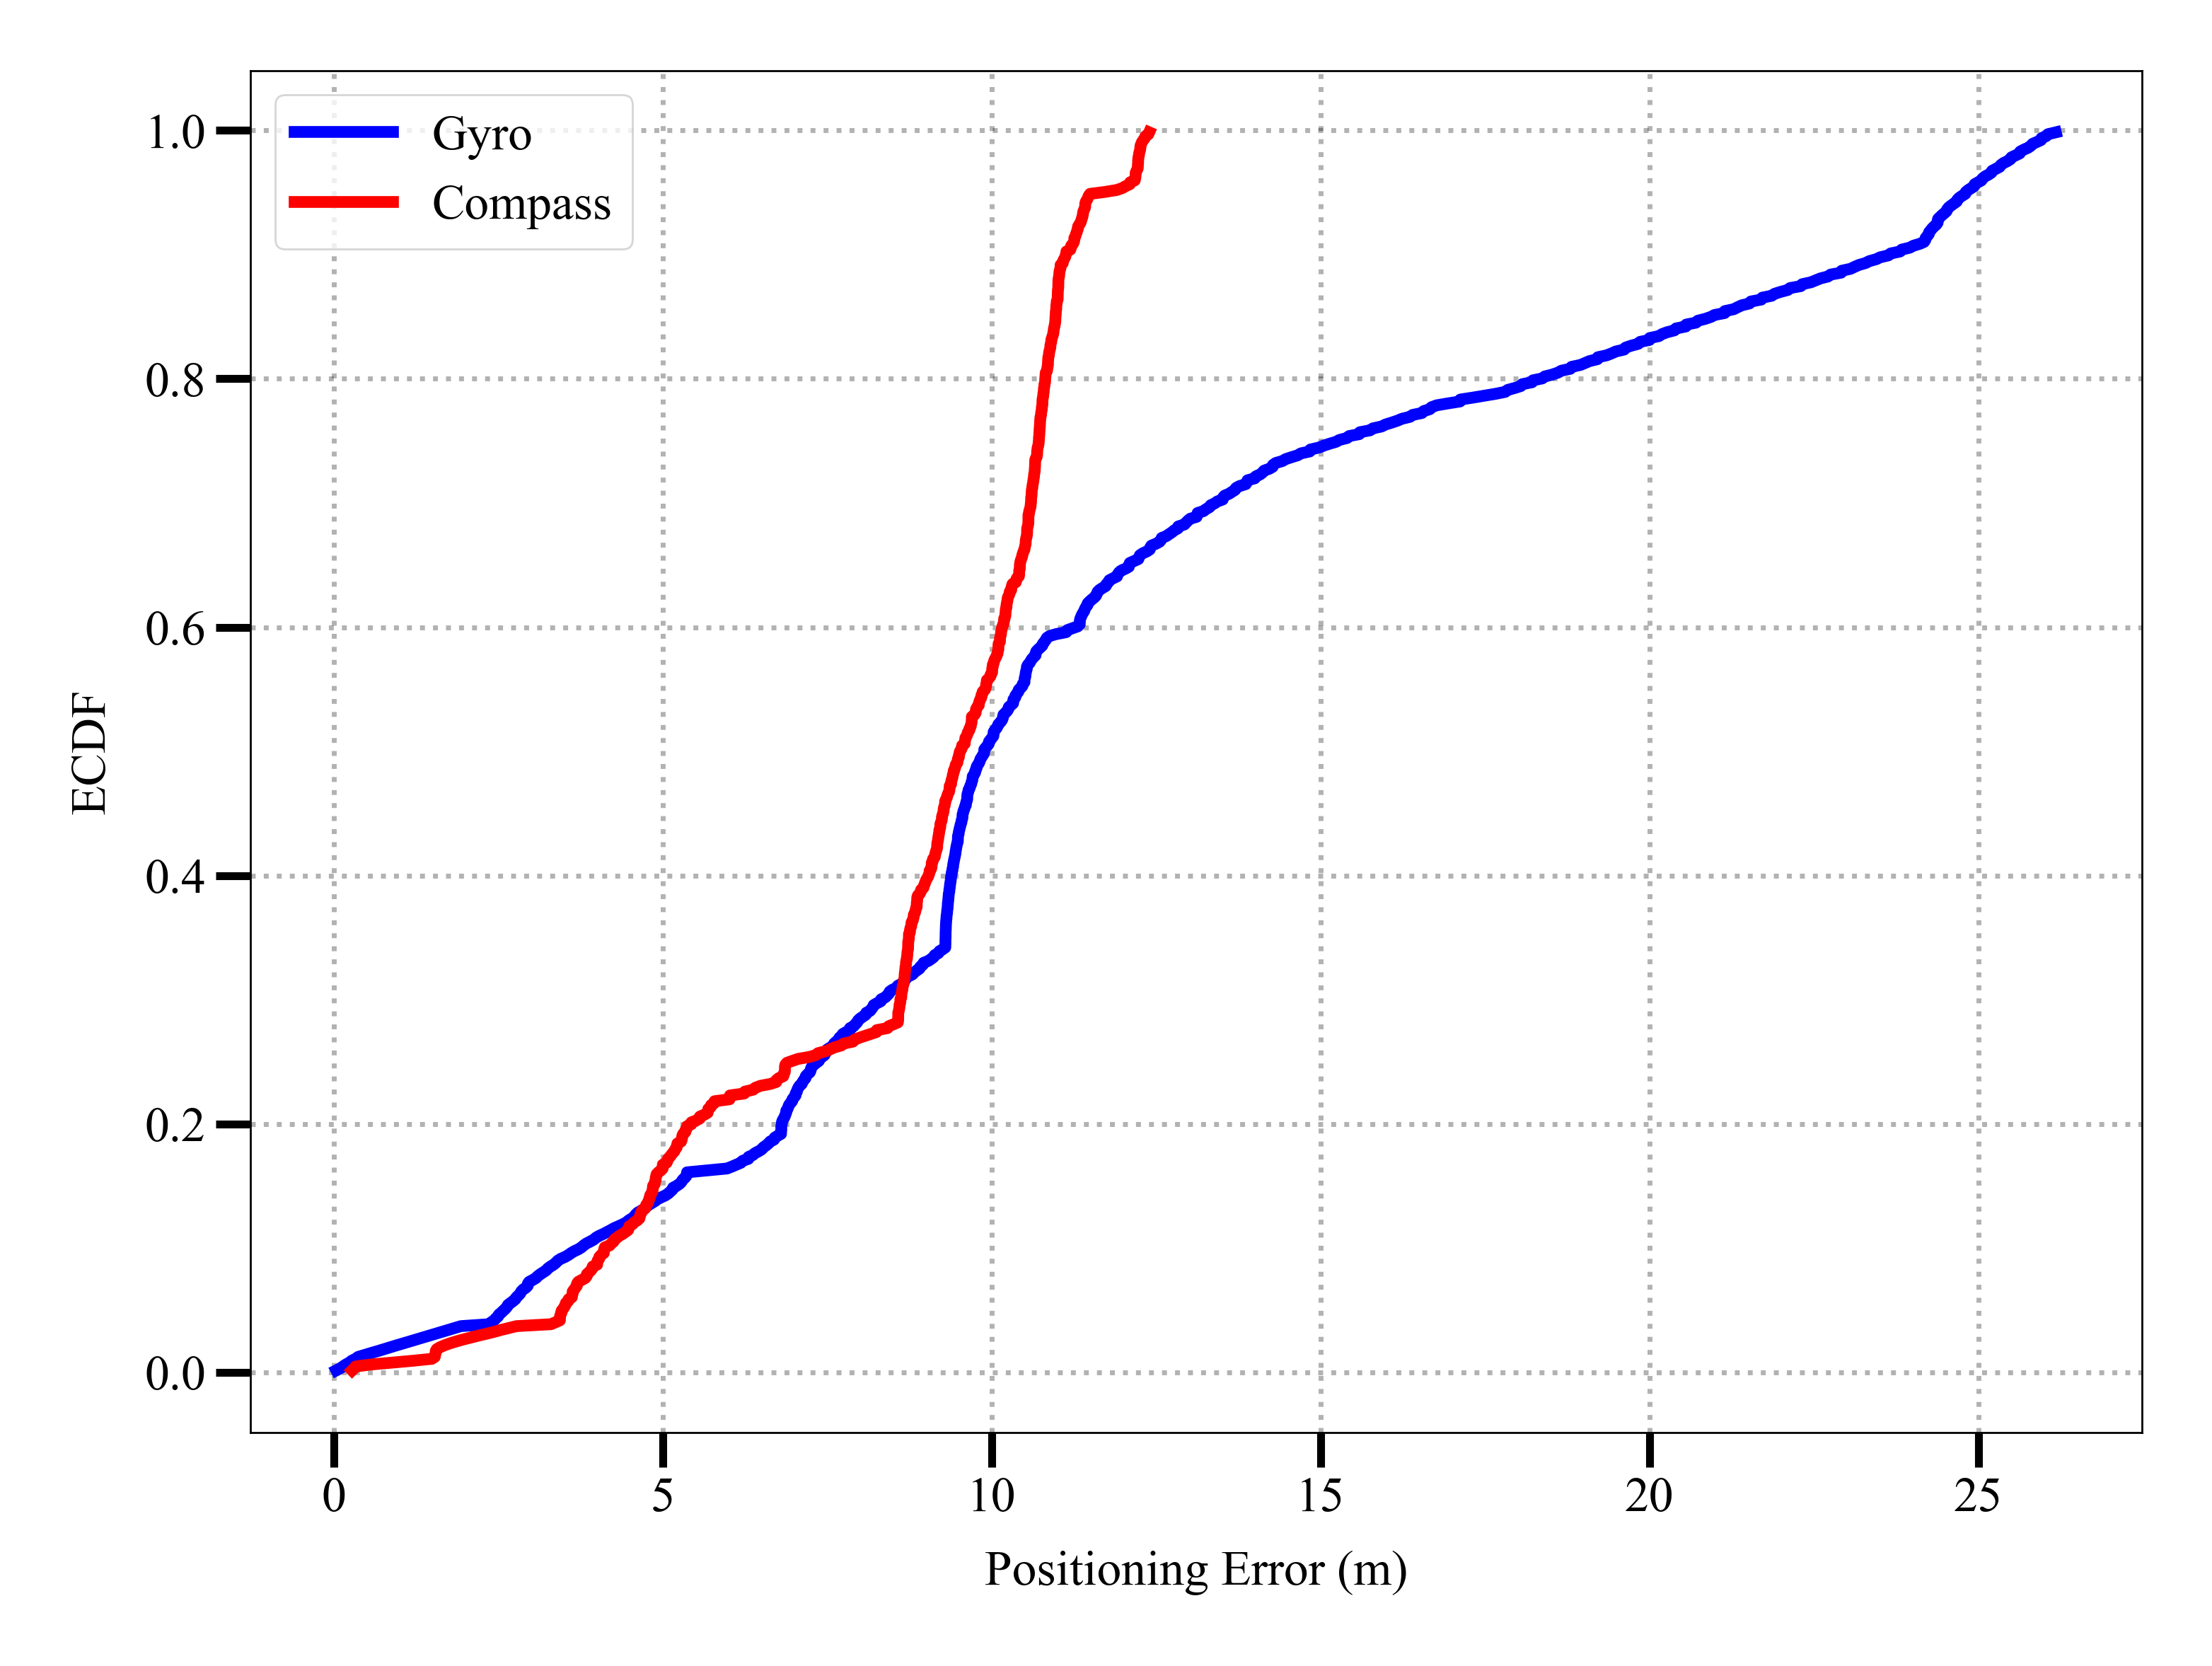

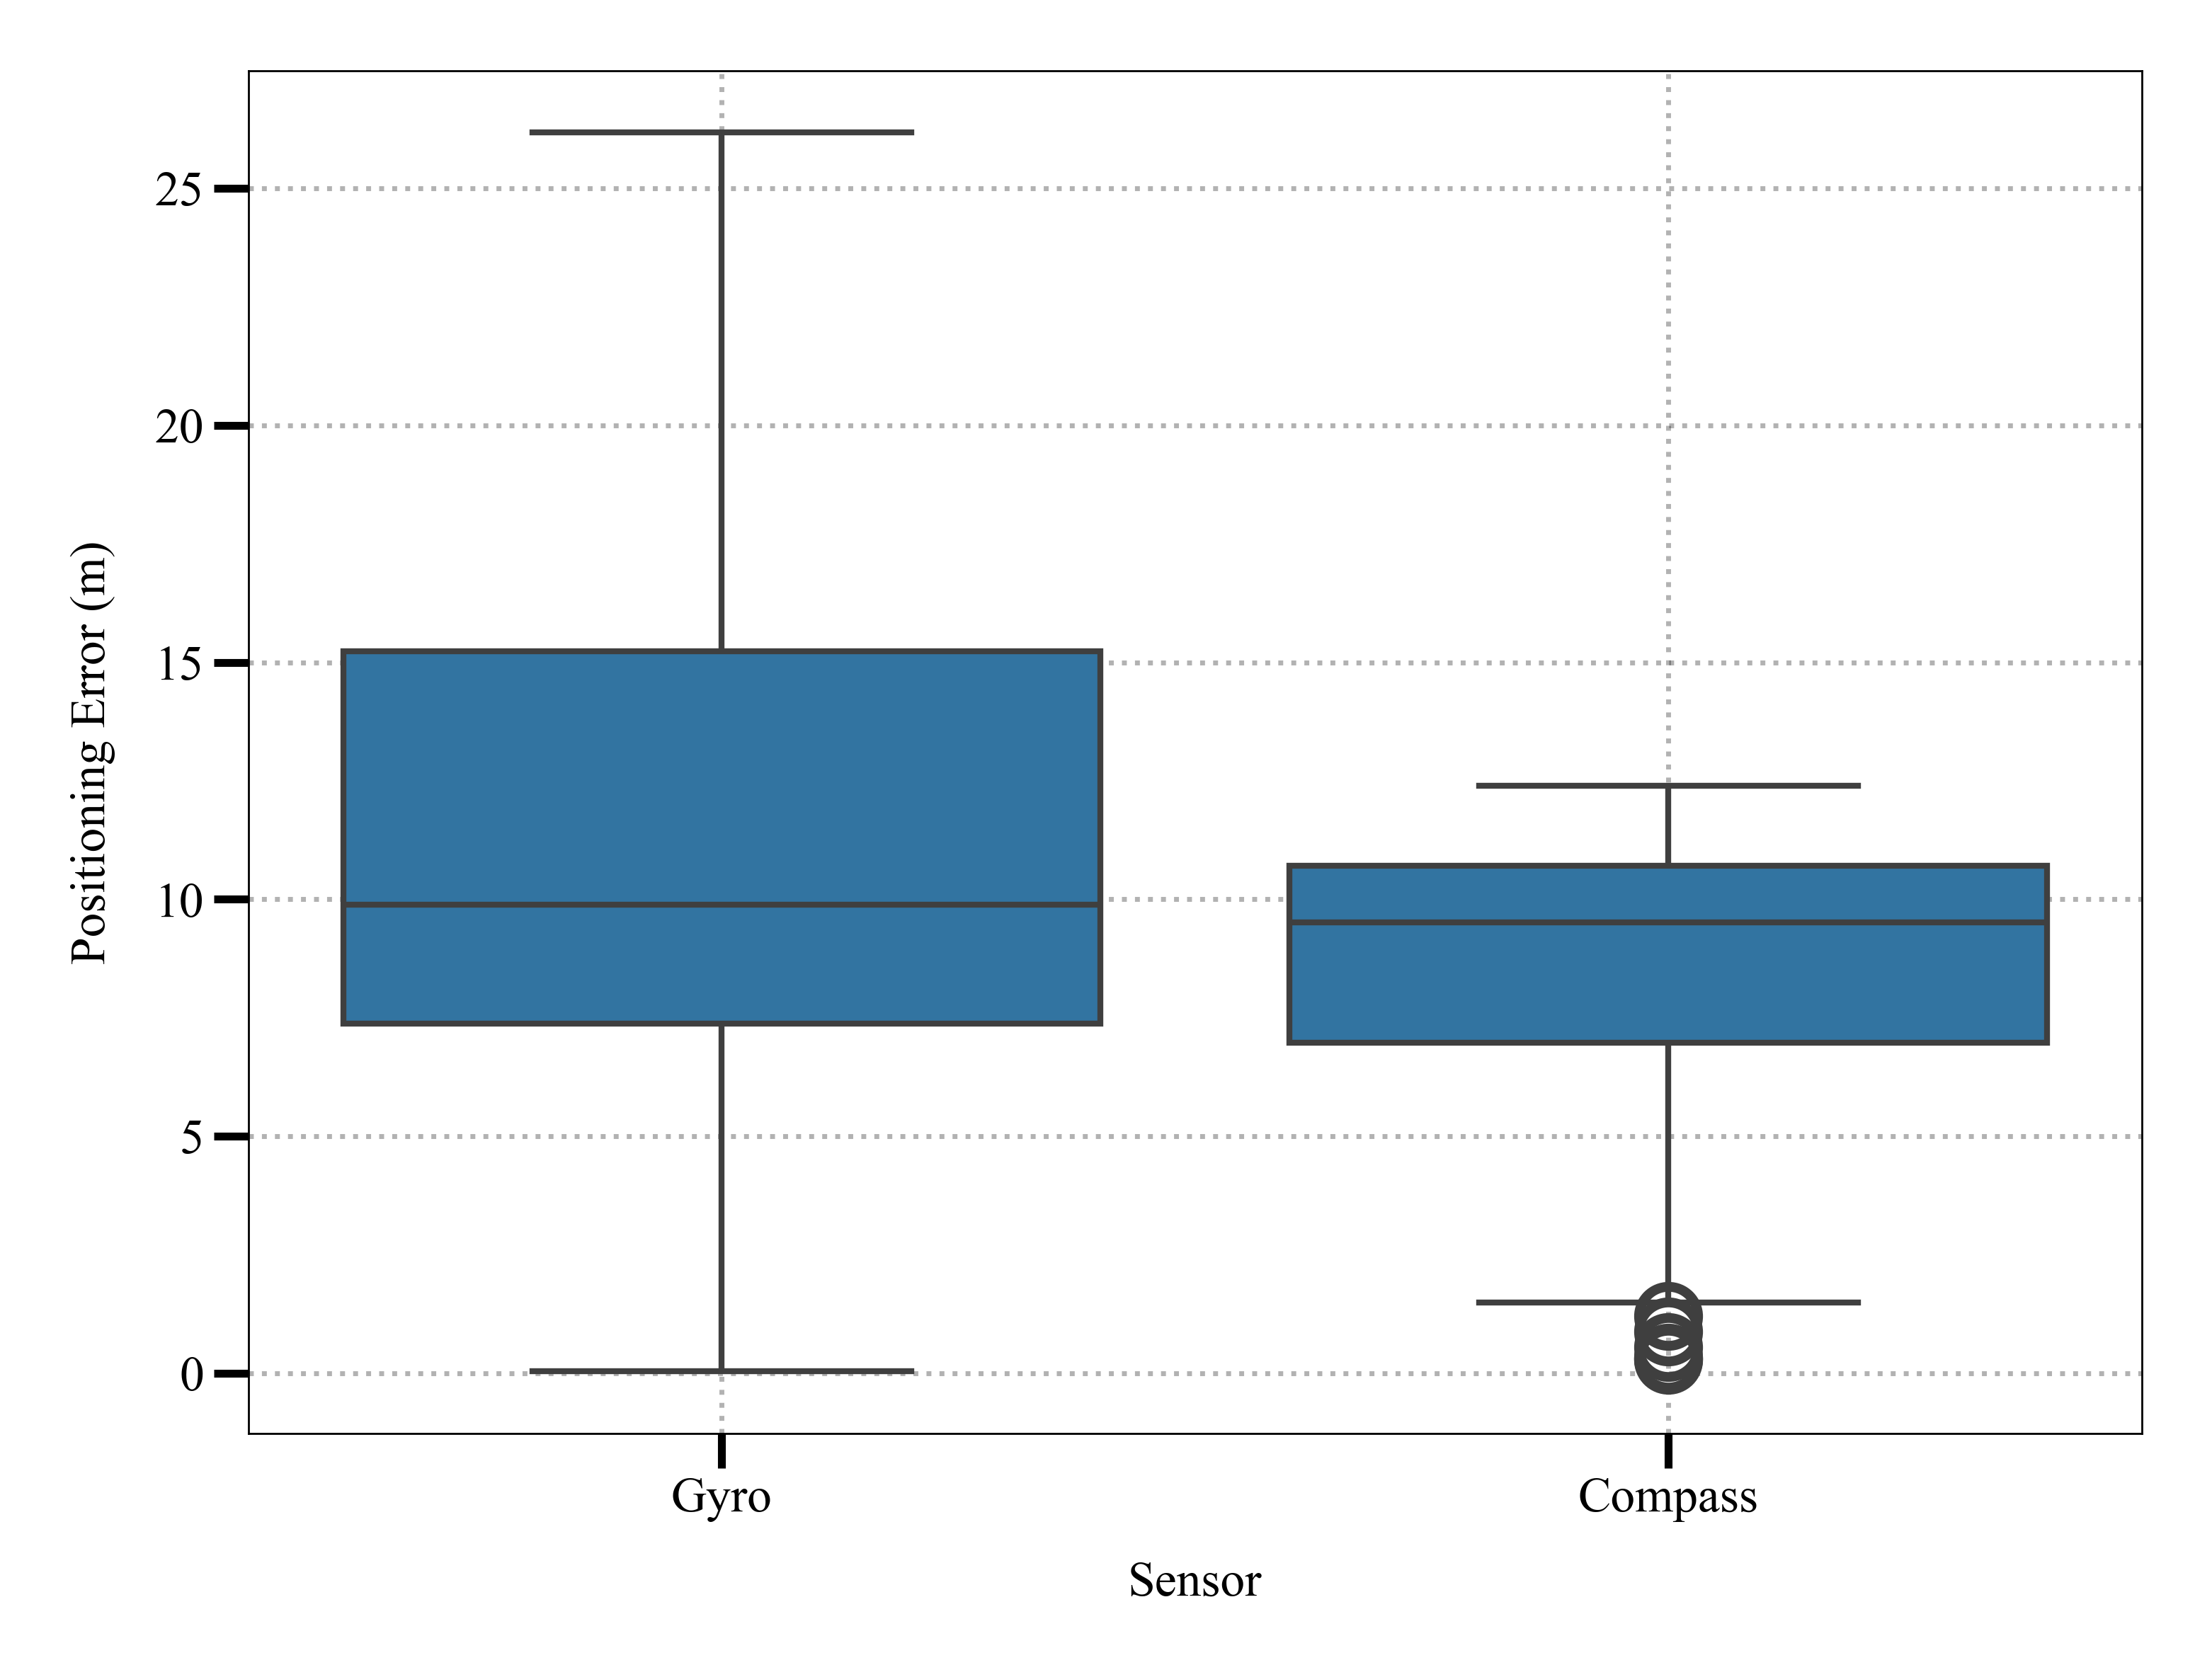

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from matplotlib.ticker import MultipleLocator

# Set IEEE-style plot parameters
fontSizeAll = 6
plt.rcParams.update({
    'xtick.major.pad': '1',
    'ytick.major.pad': '1',
    'legend.fontsize': 5,
    'legend.handlelength': 2,
    'font.size': 5,
    'axes.linewidth': 0.2,
    'patch.linewidth': 0.2,
    'font.family': "Times New Roman"
})

### **1. Plot Distance Error of Gyro vs Compass**
fig, ax1 = plt.subplots(figsize=(3.45, 2.5), dpi=1000)  # IEEE column width

ax1.plot(comapre['Walked_distance'], comapre['Gyro_Distance_Error'], 
         label='Gyro', linewidth=1.2, color='blue')
ax1.plot(comapre['Walked_distance'], comapre['Compass_Distance_Error'], 
         label='Compass', linewidth=1.2, color='red')

ax1.set_xlabel('Walked Distance (m)', labelpad=3)
ax1.set_ylabel('Positioning Error (m)', labelpad=3)

ax1.grid(True, linestyle=':', linewidth=0.5, alpha=0.3, color='k')
ax1.legend()

# Secondary x-axis for step numbers
secx = ax1.secondary_xaxis('top', functions=(lambda x: x, lambda x: x))
secx.set_xticks(comapre['Walked_distance'][::50])  
secx.set_xticklabels(comapre['step'][::50])  
secx.set_xlabel('Number of Walked Steps', labelpad=8)

# Axis formatting
ax1.xaxis.set_major_locator(MultipleLocator(50))  # Major ticks every 50 meters
ax1.yaxis.set_major_locator(MultipleLocator(5))   # Major ticks every 1 meter

plt.show()


### **2. ECDF Plot**
plt.figure(figsize=(3.45, 2.5), dpi=1000)  # IEEE column width

ecdf_gyro = sm.distributions.ECDF(comapre['Gyro_Distance_Error'])
ecdf_compass = sm.distributions.ECDF(comapre['Compass_Distance_Error'])

plt.plot(ecdf_gyro.x, ecdf_gyro.y, label='Gyro', color='blue', linewidth=1.2)
plt.plot(ecdf_compass.x, ecdf_compass.y, label='Compass', color='red', linewidth=1.2)

plt.xlabel('Positioning Error (m)', labelpad=3)
plt.ylabel('ECDF', labelpad=3)

plt.grid(True, linestyle=':', linewidth=0.5, alpha=0.3, color='k')
plt.legend()

plt.show()


### **3. Box Plot for Positioning Errors**
# Create a DataFrame for distance errors
distance_errors_df = pd.DataFrame({
    'Sensor': ['Gyro'] * len(comapre) + ['Compass'] * len(comapre),
    'Distance_Error': np.concatenate([comapre['Gyro_Distance_Error'], comapre['Compass_Distance_Error']])
})

plt.figure(figsize=(3.45, 2.5), dpi=1000)  # IEEE column width

sns.boxplot(x='Sensor', y='Distance_Error', data=distance_errors_df, linewidth=0.6)

plt.xlabel('Sensor', fontsize=5)
plt.ylabel('Positioning Error (m)', fontsize=5)

plt.grid(True, linestyle=':', linewidth=0.5, alpha=0.3, color='k')

plt.show()


In [31]:
threshold_step_difference = 0 # Set your step difference threshold here

filtered_data_magnetic = compass_data_final[(compass_data_final['step'] >= 0) & (compass_data_final['step'] <= 5000)]
filtered_data_gyro = gyro_data[(gyro_data['step'] >= 0) & (gyro_data['step'] <= 5000)]
stability_threshold=5
window_size=300

In [32]:
# Assuming 'filtered_data_gyro' contains your data with compass headings
timestamps = filtered_data_magnetic['Timestamp_(ms)']
compass_headings = filtered_data_magnetic['compass']
true_headings = filtered_data_magnetic['GroundTruthHeadingComputed']
stepss=filtered_data_magnetic['step']
Floors=filtered_data_magnetic['value_4']
Eastings=filtered_data_magnetic['GroundTruth_X']
Northings=filtered_data_magnetic['GroundTruth_Y']

In [33]:
class QuasiStaticHeadingTracker:
    def __init__(self, stability_threshold=5.0, window_size=100):
        self.stability_threshold = stability_threshold
        self.window_size = window_size
        self.compass_heading_window = []

    def add_compass_heading(self, compass_heading):
        self.compass_heading_window.append(compass_heading)
        if len(self.compass_heading_window) > self.window_size:
            self.compass_heading_window.pop(0)  # Remove oldest value to maintain window size

    def is_quasi_static_interval(self):
        if len(self.compass_heading_window) >= self.window_size:
            variance = np.var(self.compass_heading_window)
            return variance < self.stability_threshold
        return False

    def calculate_mean(self):
        if self.compass_heading_window:
            return np.mean(self.compass_heading_window)
        return None

# Example usage:
# Create an instance of the QuasiStaticHeadingTracker
tracker = QuasiStaticHeadingTracker(stability_threshold=stability_threshold, window_size=window_size)

# Initialize lists to store data points where the quasi-static interval is detected
quasi_static_intervals = []
quasi_static_headings = []
quasi_static_steps = []
quasi_static_floors = []
quasi_static_east = []
quasi_static_north = []

# Initialize a flag to track the state of the interval
is_quasi_static_interval = False
num_quasi_static_intervals = 0

# Initialize lists to store data for DataFrame
data_QS = {
    'Quasi_Static_Interval_Number': [],
    'Compass_Heading': [],
    'True_Heading': [],
    'Time':[],
    'Step':[],
    'Floor':[],
    'east':[],
    'north':[]
}


# Iterate through the compass headings and track quasi-static intervals
start_step = None  # Variable to hold the start step of the interval
temp_data = {'Time': [], 'Compass_Heading': [], 'True_Heading': [], 'Step': [], 'Floor': [], 'east': [], 'north': []}

for timestamp, heading, true, step, floor, east, north in zip(timestamps, compass_headings, true_headings, stepss, Floors, Eastings, Northings):
    tracker.add_compass_heading(heading)
    
    if tracker.is_quasi_static_interval():
        if start_step is None:
            start_step = step  # Record the start step of the interval

        # Append data to temporary arrays
        temp_data['Time'].append(timestamp)
        temp_data['Compass_Heading'].append(heading)
        temp_data['True_Heading'].append(true)
        temp_data['Step'].append(step)
        temp_data['Floor'].append(floor)
        temp_data['east'].append(east)
        temp_data['north'].append(north)

        # If it's a quasi-static interval and we're not currently in one, increment the counter
        if not is_quasi_static_interval:
            num_quasi_static_intervals += 1
            is_quasi_static_interval = True

    else:
        if is_quasi_static_interval:
            # Calculate the step difference at the end of the interval
            if start_step is not None:
                step_difference = step - start_step

                # Check if the step difference exceeds the threshold
                if step_difference >= threshold_step_difference:
                    # Add the temporary data to data_QS
                    data_QS['Quasi_Static_Interval_Number'].extend([num_quasi_static_intervals] * len(temp_data['Time']))
                    data_QS['Compass_Heading'].extend(temp_data['Compass_Heading'])
                    data_QS['True_Heading'].extend(temp_data['True_Heading'])
                    data_QS['Time'].extend(temp_data['Time'])
                    data_QS['Step'].extend(temp_data['Step'])
                    data_QS['Floor'].extend(temp_data['Floor'])
                    data_QS['east'].extend(temp_data['east'])
                    data_QS['north'].extend(temp_data['north'])
                else:
                    num_quasi_static_intervals -= 1


        is_quasi_static_interval = False
        start_step = None  # Reset the start step for the next interval
        temp_data = {'Time': [], 'Compass_Heading': [], 'True_Heading': [], 'Step': [], 'Floor': [], 'east': [], 'north': []}  # Reset temporary arrays



# After plotting, print the total number of detected quasi-static intervals
print("Number of detected quasi-static intervals:", num_quasi_static_intervals)
# Create DataFrame
quasi_static_data = pd.DataFrame(data_QS)


Number of detected quasi-static intervals: 22


In [34]:
# Group by 'Quasi_Static_Interval_Number' and calculate the mean of 'Compass_Heading' and 'True_Heading'
averages = quasi_static_data.groupby('Quasi_Static_Interval_Number').agg({
    'Compass_Heading': 'mean','True_Heading': 'mean'}).reset_index()

# Calculate absolute difference between Compass_Heading and True_Heading
averages['Abs_Difference'] = abs(averages['Compass_Heading'] - averages['True_Heading'])
averages['Abs_Difference_From_Avg'] = abs(averages['Compass_Heading'] - averages['True_Heading'])
averages

,Quasi_Static_Interval_Number,Compass_Heading,True_Heading,Abs_Difference,Abs_Difference_From_Avg
0,1,313.785225,66.778262,247.006963,247.006963
1,2,30.340048,16.203982,14.136066,14.136066
2,3,15.122048,60.151055,45.029006,45.029006
3,4,281.081139,289.112763,8.031625,8.031625
4,5,279.137363,289.112763,9.975400,9.975400
5,6,278.012330,278.204424,0.192094,0.192094
6,7,203.021428,199.311788,3.709640,3.709640
7,8,199.714564,199.311788,0.402776,0.402776
8,9,206.629727,199.311788,7.317939,7.317939
9,10,204.431146,168.643142,35.788004,35.788004


Average of Abs_Difference: 46.02358716843894


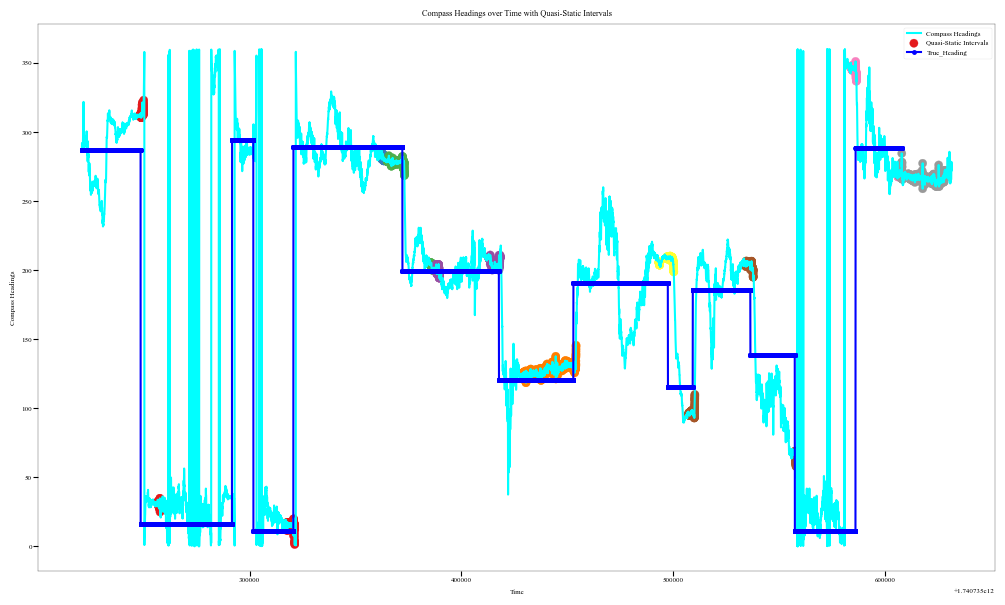

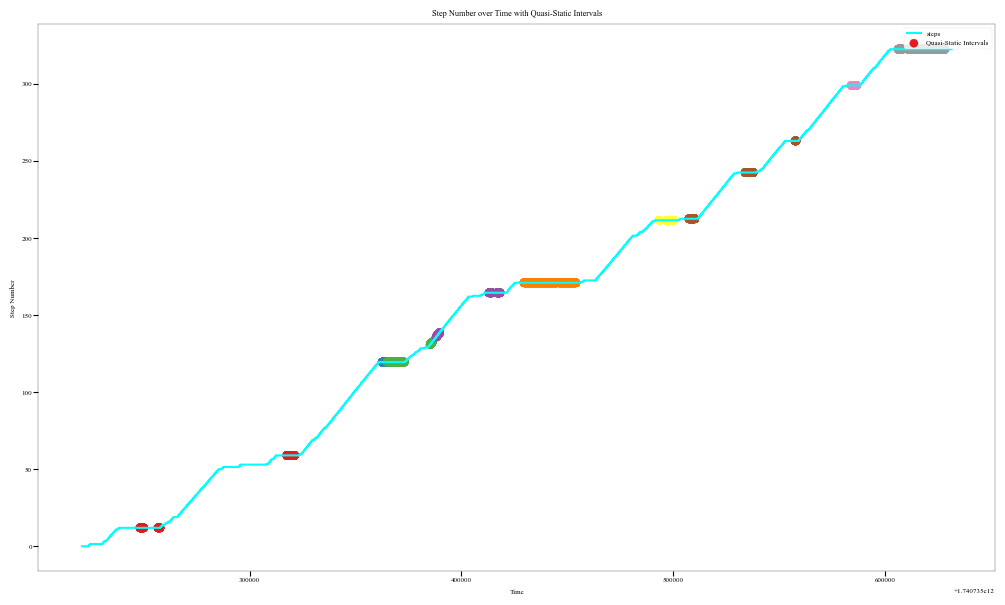

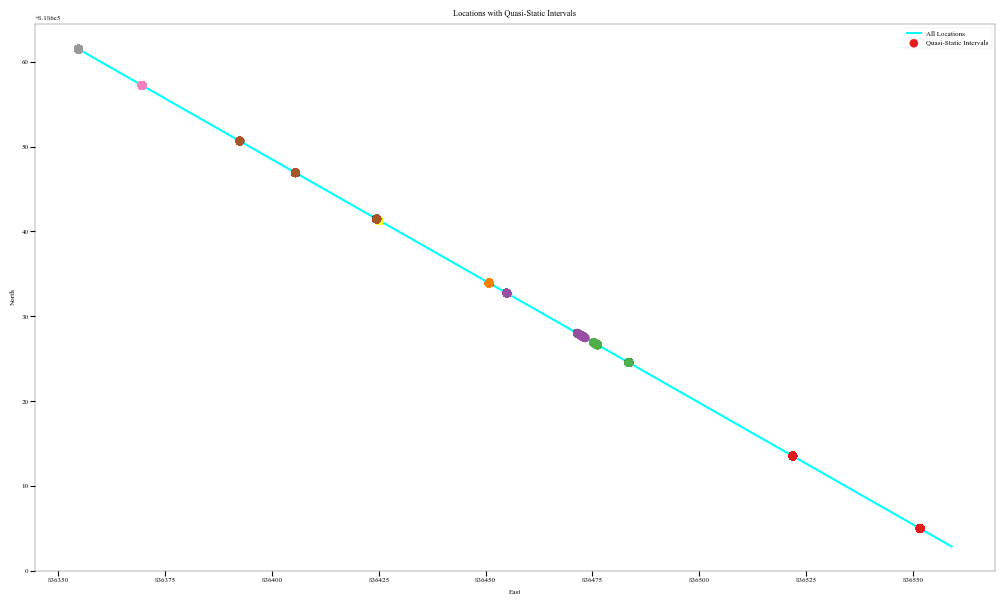

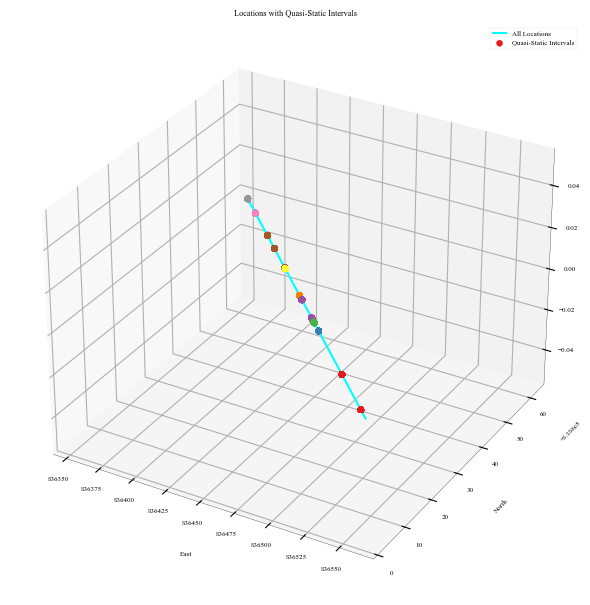

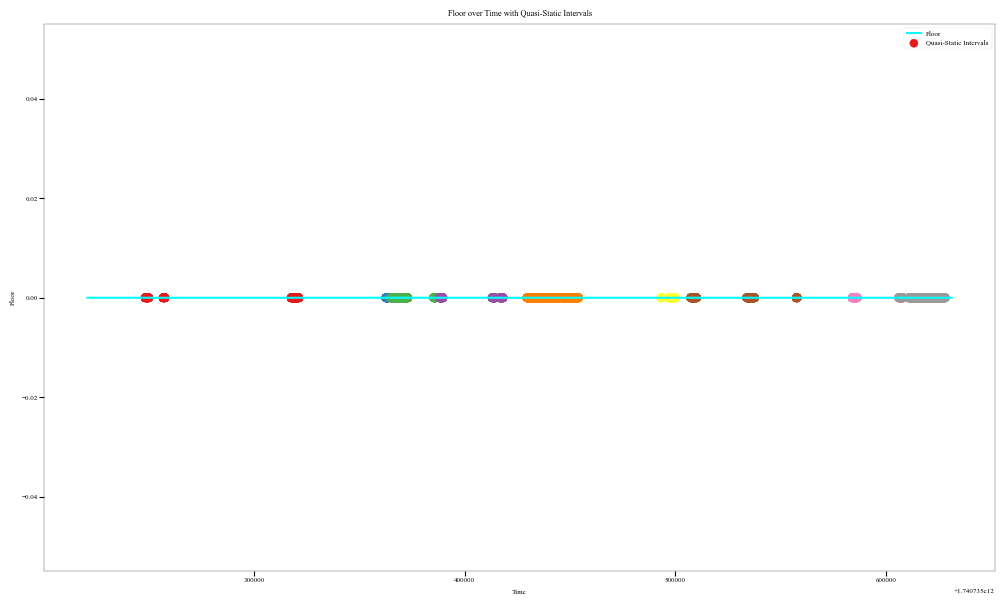

,Quasi_Static_Interval_Number,Compass_Heading,Compass_Heading_Mean_No_Outliers,True_Heading,True_Heading_Mean_No_Outliers,Abs_Difference
0,1,313.785225,313.510299,66.778262,16.203982,247.006963
1,2,30.340048,30.340048,16.203982,16.203982,14.136066
2,3,15.122048,15.379121,60.151055,11.404368,45.029006
3,4,281.081139,281.081139,289.112763,289.112763,8.031625
4,5,279.137363,279.137363,289.112763,289.112763,9.975400
5,6,278.012330,278.239540,278.204424,289.112763,0.192094
6,7,203.021428,203.021428,199.311788,199.311788,3.709640
7,8,199.714564,199.714564,199.311788,199.311788,0.402776
8,9,206.629727,206.629727,199.311788,199.311788,7.317939
9,10,204.431146,204.315293,168.643142,168.643142,35.788004


In [35]:
# Calculate the average of Abs_Difference
average_abs_difference = averages['Abs_Difference'].mean()

print("Average of Abs_Difference:", average_abs_difference)
import numpy as np
import pandas as pd
from scipy.stats import iqr

# Define a function to remove outliers using IQR
def remove_outliers(group):
    q1 = group.quantile(0.25)
    q3 = group.quantile(0.75)
    iqr_val = q3 - q1
    lower_bound = q1 - 1.5 * iqr_val
    upper_bound = q3 + 1.5 * iqr_val
    return group[(group >= lower_bound) & (group <= upper_bound)]

# Apply the function to each group and calculate the mean after removing outliers
def calculate_mean_without_outliers(group):
    return remove_outliers(group).mean()

# Group by 'Quasi_Static_Interval_Number' and calculate the mean of 'Compass_Heading' and 'True_Heading'
averages = quasi_static_data.groupby('Quasi_Static_Interval_Number').agg({
    'Compass_Heading': ['mean', calculate_mean_without_outliers],
    'True_Heading': ['mean']
}).reset_index()

# Rename columns for better understanding
averages.columns = ['Quasi_Static_Interval_Number', 
                    'Compass_Heading', 'Compass_Heading_Mean_No_Outliers',
                    'True_Heading']

def last_heading(group):
    return group['Compass_Heading'].iloc[-1] if not group.empty else None

# Group by 'Quasi_Static_Interval_Number' and calculate the required statistics
averages = quasi_static_data.groupby('Quasi_Static_Interval_Number').agg({
    'Compass_Heading': ['mean', calculate_mean_without_outliers],
    'True_Heading': ['mean', calculate_mean_without_outliers],
}).reset_index()

# Rename columns for better understanding
averages.columns = ['Quasi_Static_Interval_Number', 
                    'Compass_Heading', 'Compass_Heading_Mean_No_Outliers',
                    'True_Heading', 'True_Heading_Mean_No_Outliers']

# Calculate absolute difference between Compass_Heading and True_Heading
averages['Abs_Difference'] = abs(averages['Compass_Heading'] - averages['True_Heading'])

# Calculate the average of Abs_Difference
average_abs_difference = averages['Abs_Difference'].mean()
# print("Average of Abs_Difference:", average_abs_difference)



# Plotting compass headings over time
plt.figure(figsize=(10, 6))

plt.plot(timestamps, compass_headings, label='Compass Headings', color='cyan')
plt.scatter(quasi_static_data['Time'], quasi_static_data['Compass_Heading'],
            c=quasi_static_data['Quasi_Static_Interval_Number'], cmap='Set1',zorder=1, label='Quasi-Static Intervals')

plt.plot(filtered_data_gyro['Timestamp_(ms)'], filtered_data_gyro['GroundTruthHeadingComputed'], 
         marker='.', linestyle='-', markersize=5, color='blue', label='True_Heading' )
# plt.plot(filtered_data_gyro['Timestamp_(ms)'], (-filtered_data_gyro['value_2']+300)%360, marker='.', 
#             linestyle='-', markersize=2, color='orange', label='Gyro' )


plt.xlabel('Time')
plt.ylabel('Compass Headings')
plt.title('Compass Headings over Time with Quasi-Static Intervals')
plt.legend()
plt.tight_layout()
plt.show()


# Plotting compass headings over time
plt.figure(figsize=(10, 6))

plt.plot(timestamps, stepss, label='steps', color='cyan')
plt.scatter(quasi_static_data['Time'], quasi_static_data['Step'],
            c=quasi_static_data['Quasi_Static_Interval_Number'], cmap='Set1',zorder=1, label='Quasi-Static Intervals')

plt.xlabel('Time')
plt.ylabel('Step Number')
plt.title('Step Number over Time with Quasi-Static Intervals')
plt.legend()
plt.tight_layout()
plt.show()

# Plotting compass headings over time
plt.figure(figsize=(10, 6))


plt.plot(Eastings, Northings, label='All Locations', color='cyan')
plt.scatter(quasi_static_data['east'], quasi_static_data['north'],
            c=quasi_static_data['Quasi_Static_Interval_Number'], cmap='Set1',zorder=5, label='Quasi-Static Intervals')

plt.xlabel('East')
plt.ylabel('North')
plt.title('Locations with Quasi-Static Intervals')
plt.legend()
plt.tight_layout()
plt.show()

from mpl_toolkits.mplot3d import Axes3D

# Create a new figure
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

plt.plot(Eastings, Northings,Floors, label='All Locations', color='cyan')
# ax.scatter(Eastings, Northings, Floors, c=Floors, cmap='Blues', label='All Locations')
ax.scatter(quasi_static_data['east'], quasi_static_data['north'], quasi_static_data['Floor'],
                     c=quasi_static_data['Quasi_Static_Interval_Number'], cmap='Set1',zorder=10, label='Quasi-Static Intervals')

# scatter_qs = ax.scatter(quasi_static_data['east'], quasi_static_data['north'], quasi_static_data['Floor'],
#                         c=quasi_static_data['Quasi_Static_Interval_Number'], s=20,cmap='Set1', label='Quasi-Static Intervals')
# ax.scatter(Eastings, Northings, Floors, c=Floors, cmap='Blues',s=1, label='All Locations')

ax.set_xlabel('East')
ax.set_ylabel('North')
ax.set_zlabel('Floor')
ax.set_title('Locations with Quasi-Static Intervals')
ax.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))

plt.plot(timestamps, Floors, label='Floor', color='cyan')
plt.scatter(quasi_static_data['Time'], quasi_static_data['Floor'],
            c=quasi_static_data['Quasi_Static_Interval_Number'], cmap='Set1',zorder=1, label='Quasi-Static Intervals')
plt.xlabel('Time')
plt.ylabel('Floor')
plt.title('Floor over Time with Quasi-Static Intervals')
plt.legend()
plt.tight_layout()
plt.show()


averages